<h1 style="text-align:center;vertical-align:middle">Youtube数据分析与预处理报告</h1>

## 数据概览

数据给出了不同国家在Youtube上的流行视频的观看情况。

In [1]:
import numpy as np
import pandas as pd
import auto

In [2]:
root = '../Assignment4/youtube-new'

In [2]:
CA = auto.c_data(root,'CAvideos.csv')
CA_data = CA.data
CA_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

每行数据包括16个列，分别代表：

- **video_id** 视频id，唯一属性
- **trending_date** 流行时间
- **title** 视频标题
- **channel_title** 发布频道
- **category_id** 类别id（每个国家对应的类别不同）
- **publish_time** 发布时间
- **tags** 视频标签
- **views** 观看数量
- **likes** 喜欢数量
- **dislikes** 不喜欢数量
- **comment_count** 评论数量
- **thumbnail_link** 视频链接，唯一属性
- **comments_disabled** 是否禁止评论
- **ratings_disabled** 是否禁止打分
- **video_error_or_removed** 是否错误或删除
- **description** 视频描述

接下来的内容将区分国家，对以上属性中的数值属性以及有意义的非唯一标称属性进行数据分析与预处理。其中CA为展示具体处理流程，其他国家因为过程相似，部分重复内容不再详述，仅给出各数据摘要和代码流程，具体方法参考CA章节的内容。

## 1 加拿大(CA)
### 1.1 流行时间trending_date(无缺失值)
**频率统计**

In [3]:
freq = CA_data['trending_date'].value_counts()
freq

18.31.05    200
18.10.03    200
18.11.03    200
18.17.05    200
17.16.12    200
           ... 
18.02.02    195
18.13.02    195
18.31.01    191
18.01.02    190
18.14.05    171
Name: trending_date, Length: 205, dtype: int64

In [4]:
for i in set(freq.values):
    print(i,end=':')
    for j in list(filter(lambda x : freq[x] == i,sorted(freq.index))):
        print(j,end=' ')
    print()

195:18.02.02 18.13.02 
196:18.29.01 
197:18.09.03 18.19.03 18.25.04 18.28.02 
198:17.07.12 18.06.02 18.15.02 18.19.05 18.23.02 18.24.02 18.27.02 
199:17.04.12 17.12.12 17.19.11 17.21.12 17.26.11 17.29.12 18.03.02 18.03.03 18.04.03 18.05.02 18.07.03 18.10.02 18.10.05 18.11.02 18.14.02 18.14.03 18.14.04 18.15.05 18.16.02 18.17.02 18.18.02 18.19.01 18.21.02 18.22.01 18.22.02 18.23.04 18.26.02 18.27.01 18.27.03 18.28.03 18.29.04 
200:17.01.12 17.02.12 17.03.12 17.05.12 17.06.12 17.08.12 17.09.12 17.10.12 17.11.12 17.13.12 17.14.11 17.14.12 17.15.11 17.15.12 17.16.11 17.16.12 17.17.11 17.17.12 17.18.11 17.18.12 17.19.12 17.20.11 17.20.12 17.21.11 17.22.11 17.22.12 17.23.11 17.23.12 17.24.11 17.24.12 17.25.11 17.25.12 17.26.12 17.27.11 17.27.12 17.28.11 17.28.12 17.29.11 17.30.11 17.30.12 17.31.12 18.01.01 18.01.03 18.01.04 18.01.05 18.01.06 18.02.01 18.02.03 18.02.04 18.02.05 18.02.06 18.03.01 18.03.04 18.03.05 18.03.06 18.04.01 18.04.02 18.04.04 18.04.05 18.04.06 18.05.01 18.05.03 18.05.04

由以上结果可知（左边为出现频数，右边为日期），大多数流行时间的trending viedo的个数都为200个，其余少数日期的个数为171、190、191、195、196、197、198、199，无缺失值。

**频数分布**

Populating the interactive namespace from numpy and matplotlib


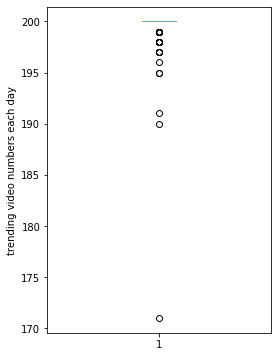

In [5]:
from matplotlib import pyplot as plt
%pylab inline
# 盒图
fig = plt.figure(figsize=(4, 6))
plt.boxplot(np.array(freq), notch=False, vert=True)
plt.ylabel('trending video numbers each day')
plt.show()

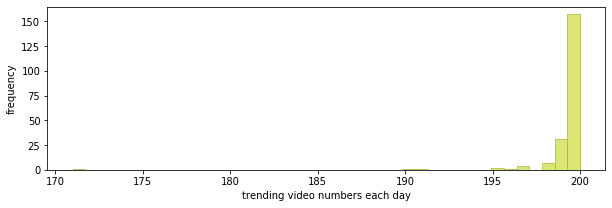

In [6]:
# 直方图
fig = plt.figure(figsize=(10, 3))
plt.hist(np.array(freq), bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.xlabel('trending video numbers each day')
plt.ylabel('frequency')
plt.show()

从盒图可以看出，由于数据集中一天内大部分流行视频的数目都为200，导致盒图的盒子里只有200一个数，直方图上也可以看出，频数分布在200附近，距离较为离群的点为2018年5月14日的流行视频数量，为171。根据推测是该数据集的收录有问题，应该youtube热榜每天都是200个，也可能真的是那几天的稿件比较少。

### 1.2 类别category_id(存在间接缺失值)

In [7]:
CA_data['category_id'].values

array([10, 23, 23, ..., 20, 25, 24])

In [21]:
import json
def get_category_list(path,filename):
    with open(path + '/' + filename ,'r') as f:
        d = json.load(f)
    res = {}
    for i in d['items']:
        res[i['id']] = i['snippet']['title']
    return res

In [22]:
CA_list = get_category_list(root,'CA_category_id.json')

In [9]:
# 查找类别名，若存在缺失，先用unknown表示
cate = []
for i in CA_data['category_id'].values:
    if(str(i) in CA_list.keys()):
        cate.append(CA_list[str(i)])
    else:
        cate.append('unknown')

**频数统计**

In [10]:
freq = pd.Series(cate).value_counts()
freq

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
unknown                    74
Movies                      6
dtype: int64

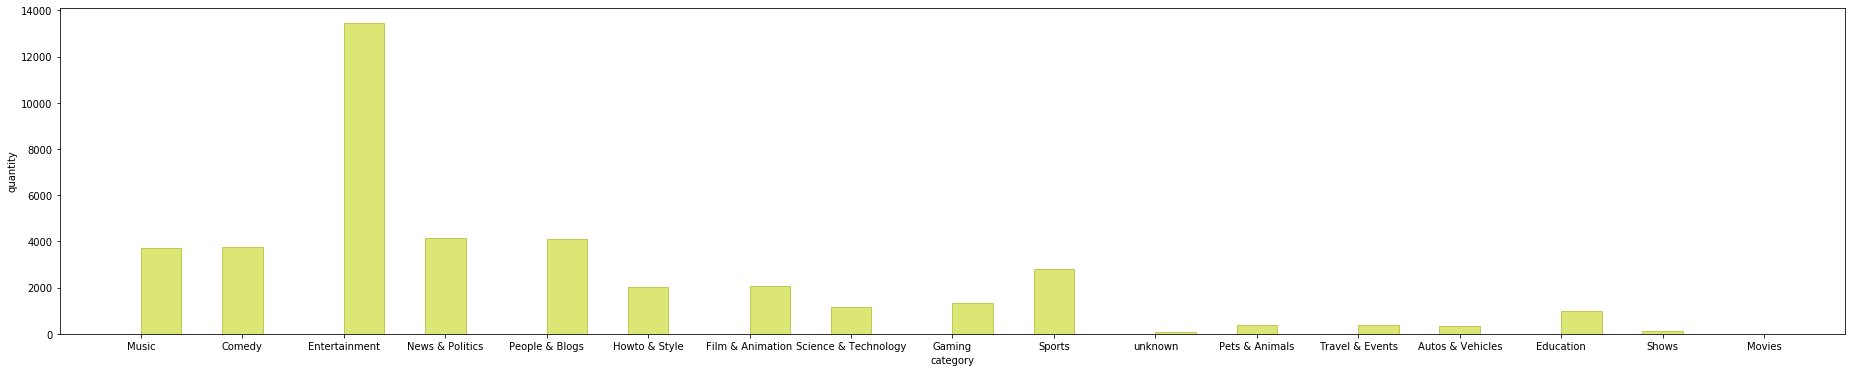

In [11]:
fig = plt.figure(figsize=(32, 6))
plt.hist(np.array(cate), bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.xlabel('category')
plt.ylabel('quantity')
plt.show()

可以看出娱乐类别的流行视频量是所有分类里最多的，为13451件，其余比较多的视频类型为音乐、喜剧、时政等等，其它视频的频数如上图、表所示。由于所给分类释义的json文件存在于id对应不上的情况，导致有些编号的category_id无法确定其意义，间接性的产生了数据缺失，在图中用unknown表示，有74例。

**频数分布**

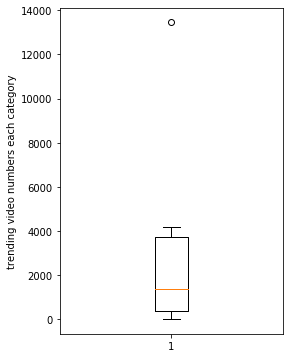

In [12]:
# 盒图
fig = plt.figure(figsize=(4, 6))
plt.boxplot(np.array(freq), notch=False, vert=True)
plt.ylabel('trending video numbers each category')
plt.show()

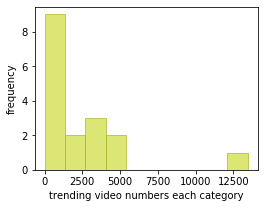

In [13]:
# 直方图
fig = plt.figure(figsize=(4, 3))
plt.hist(np.array(freq), facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.xlabel('trending video numbers each category')
plt.ylabel('frequency')
plt.show()

从盒图可以看出来，分类视频量的离群点为频数为13451的娱乐视频，通过直方图可以看出大多数类别的视频数量在0-5000之间。

**缺失值处理**

正如上文提到，由于所给分类释义的json文件存在于id对应不上的情况，导致有些编号的category_id无法确定其意义，间接性的产生了数据缺失，推测其原因：json文件可以看出是来自youtube接口的一个response，并且每个类别对应有频道，可能是获取时存在于数据集里的视频被删除或其它原因导致这个category的id没有出现在response里。对此，进行了两种数据缺失的处理：
- 删除所有没有分类标签的数据

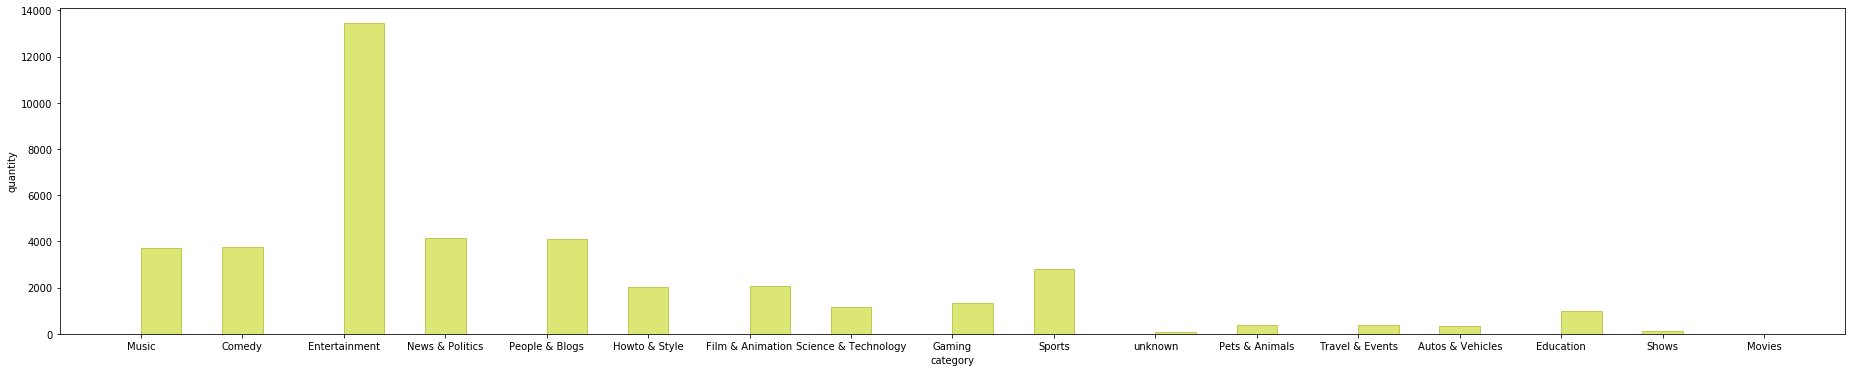

In [14]:
# 原频数直方图
fig = plt.figure(figsize=(32, 6))
plt.hist(np.array(cate), bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.xlabel('category')
plt.ylabel('quantity')
plt.show()

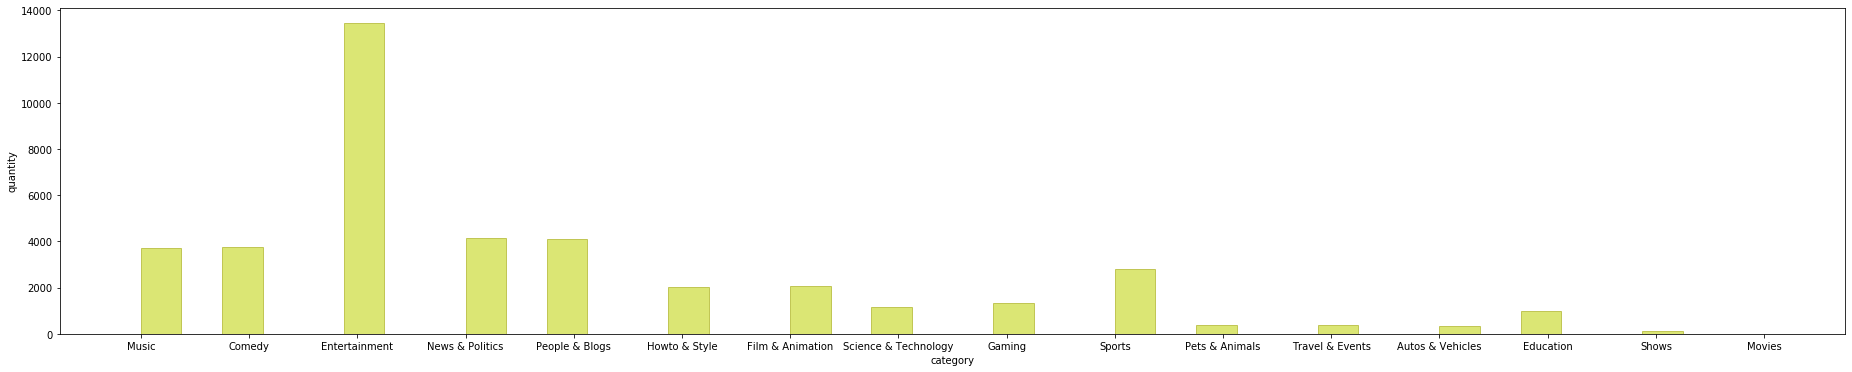

In [15]:
# 删除缺失数据后的频数直方图
d_cate = [x for x in cate if x != 'unknown']
fig = plt.figure(figsize=(32, 6))
plt.hist(np.array(d_cate), bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.xlabel('category')
plt.ylabel('quantity')
plt.show()

- 用最高频数的分类（Entertainment）代替未知分类

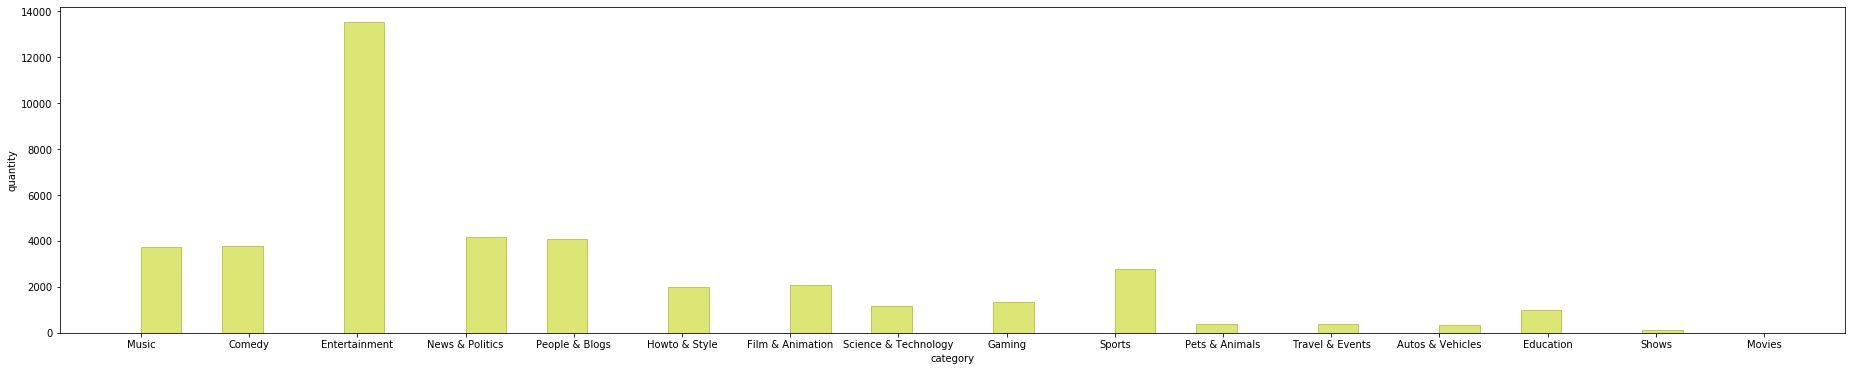

In [16]:
# 用最高频数值填充后的频数直方图
m_cate = d_cate + 74 * ['Entertainment']
fig = plt.figure(figsize=(32, 6))
plt.hist(np.array(m_cate), bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.xlabel('category')
plt.ylabel('quantity')
plt.show()

### 1.3 标签tags(存在缺失值)
tags如果不进行tag提取，则每一项是唯一值，原数据集存在缺失值，原因应该是博主本身就没有添加tag。可以通过以下方式进行缺失值的填充。
- 通过属性的相关关系来填补缺失值

即将“title”属性或“description”属性分词后作为tag填充。

In [17]:
CA.select_col('tags')
n_b = CA.count_none('[none]')
#有2385条数据的tags为空

2385


In [18]:
CA.fill_none('title',none_token='[none]')
# 这里用title进行填充 因为后面会提到description也有缺失值
n_a = CA.count_none('[none]')

0


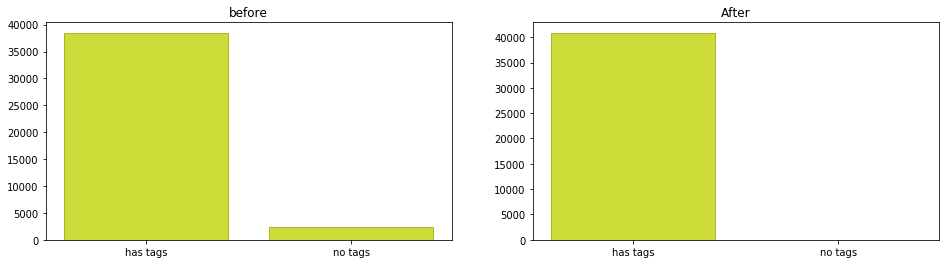

In [19]:
CA.normal_bar(16,4,n_b,n_a,['has tags','no tags'])

### 1.4 观看数量views(无缺失值)
**数据摘要**

In [20]:
views = np.array(CA_data['views'].values)
print('Min:',views.min())
print('Q1:', np.percentile(views,25))
print('Q2:', np.percentile(views,50))
print('Q3:', np.percentile(views,75))
print('Max:', views.max())

Min: 733
Q1: 143902.0
Q2: 371204.0
Q3: 963302.0
Max: 137843120


五数概括：Min=733;Q1=143902;Q2=371204;Q3=963302;Max=137843120

**数据分布**

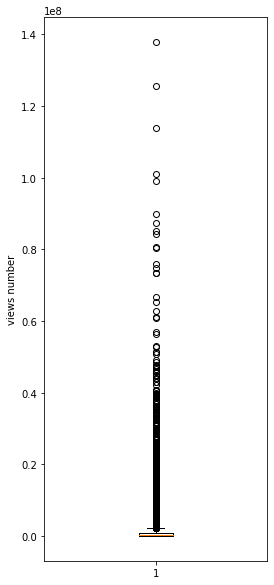

In [21]:
# 盒图
fig = plt.figure(figsize=(4, 10))
plt.boxplot(views, notch=False, vert=True)
plt.ylabel('views number')
plt.show()

In [22]:
# 数据范围太大 分段处理
views.sort()
p1 = np.searchsorted(views, 5000000)
p2 = np.searchsorted(views, 20000000)
v1 = views[:p1]
v2 = views[p1:p2]
v3 = views[p2:]

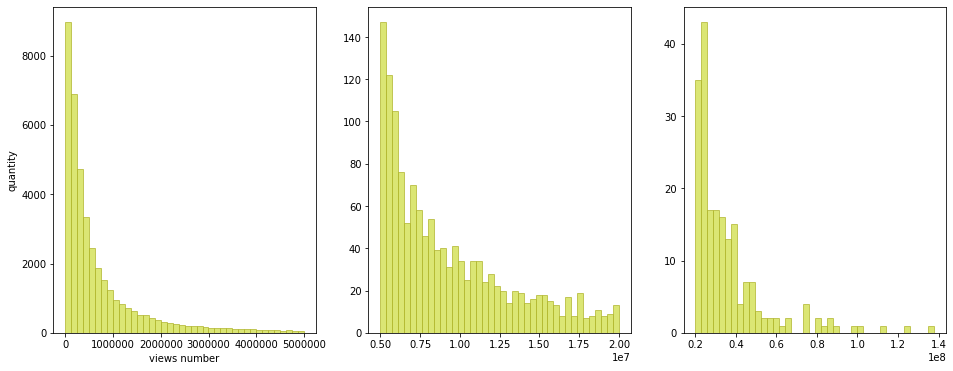

2192402.0


In [23]:
# 分段直方图
fig1 = plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.hist(v1, bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.xlabel('views number')
plt.ylabel('quantity')
plt.subplot(132)
plt.hist(v2, bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.subplot(133)
plt.hist(v3, bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.show()
outlier = np.percentile(views,75) + (np.percentile(views,75) - np.percentile(views,25)) * 1.5
print(outlier)

由盒图和直方图可以看出，同为流行视频，其播放量差异还是非常明显：观看量在150w以下的视频占了绝大多数，盒图中表明，超过2192402观看量的点都为离群点了。

### 1.5 喜欢数量likes(无缺失值)

**数据摘要**

In [24]:
likes = np.array(CA_data['likes'].values)
print('Min:',likes.min())
print('Q1:', np.percentile(likes,25))
print('Q2:', np.percentile(likes,50))
print('Q3:', np.percentile(likes,75))
print('Max:', likes.max())

Min: 0
Q1: 2191.0
Q2: 8780.0
Q3: 28717.0
Max: 5053338


五数概括：Min=0;Q1=2191;Q2=8789;Q3=28717;Max=5053338

**数据分布**

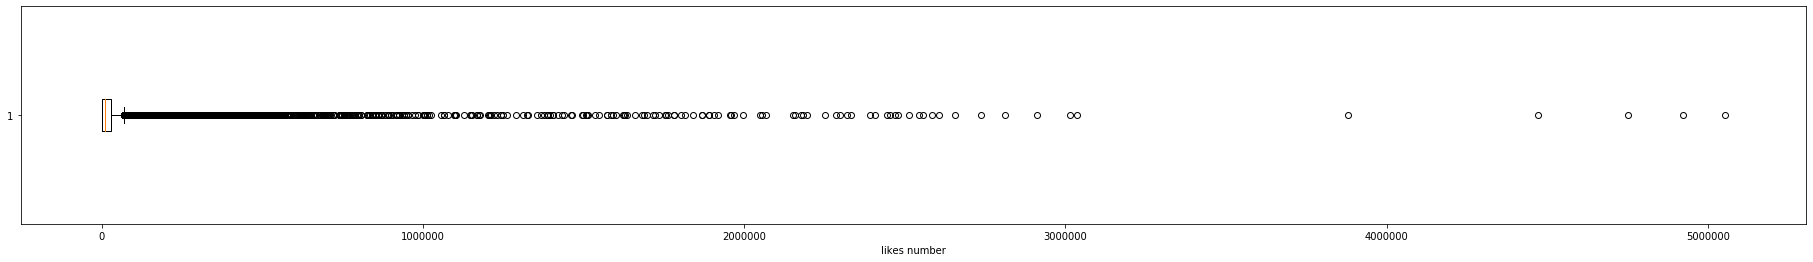

68506.0


In [25]:
# 盒图
fig = plt.figure(figsize=(32, 4))
plt.boxplot(likes, notch=False, vert=False)
plt.xlabel('likes number')
plt.show()
outlier = np.percentile(likes,75) + (np.percentile(likes,75) - np.percentile(likes,25)) * 1.5
print(outlier)

In [26]:
# 分段直方图
likes.sort()
p1 = np.searchsorted(likes, 50000)
p2 = np.searchsorted(likes, 500000)
v1 = likes[:p1]
v2 = likes[p1:p2]
v3 = likes[p2:]

(array([112.,  56.,  39.,  31.,  15.,  13.,  11.,  11.,  10.,  11.,   8.,
          7.,   9.,   4.,   5.,   4.,   3.,   6.,   4.,   1.,   1.,   1.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   1.,   1.]),
 array([ 501039.   ,  614846.475,  728653.95 ,  842461.425,  956268.9  ,
        1070076.375, 1183883.85 , 1297691.325, 1411498.8  , 1525306.275,
        1639113.75 , 1752921.225, 1866728.7  , 1980536.175, 2094343.65 ,
        2208151.125, 2321958.6  , 2435766.075, 2549573.55 , 2663381.025,
        2777188.5  , 2890995.975, 3004803.45 , 3118610.925, 3232418.4  ,
        3346225.875, 3460033.35 , 3573840.825, 3687648.3  , 3801455.775,
        3915263.25 , 4029070.725, 4142878.2  , 4256685.675, 4370493.15 ,
        4484300.625, 4598108.1  , 4711915.575, 4825723.05 , 4939530.525,
        5053338.   ]),
 <a list of 40 Patch objects>)

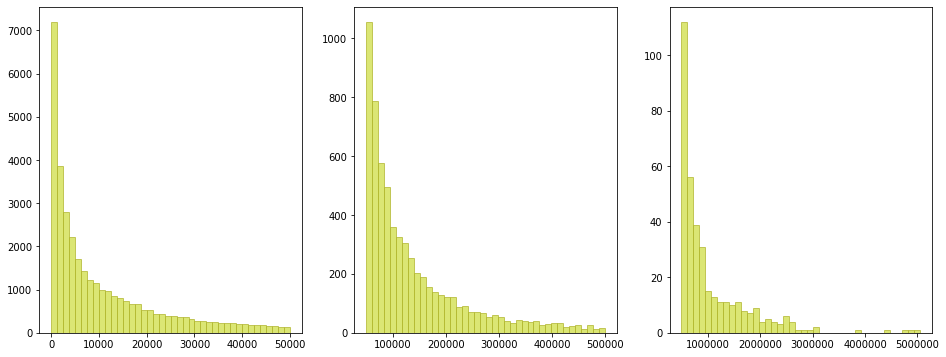

In [27]:
fig1 = plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.hist(v1, bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.subplot(132)
plt.hist(v2, bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
plt.subplot(133)
plt.hist(v3, bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)

由盒图和直方图可以看出，其喜欢数量的差异还是非常明显：喜欢量在3w以下的视频占了绝大多数，盒图中表明，超过68506喜欢数量的点都为离群点。

### 1.6 不喜欢数量dislikes(无缺失值)

**数据摘要**

In [28]:
CA.select_col('dislikes')

In [29]:
CA.five_number()

Min: 0
Q1: 99.0
Q2: 303.0
Q3: 950.0
Max: 1602383


五数概括：Min=0;Q1=99;Q2=303;Q3=950;Max=1602383

**数据分布**

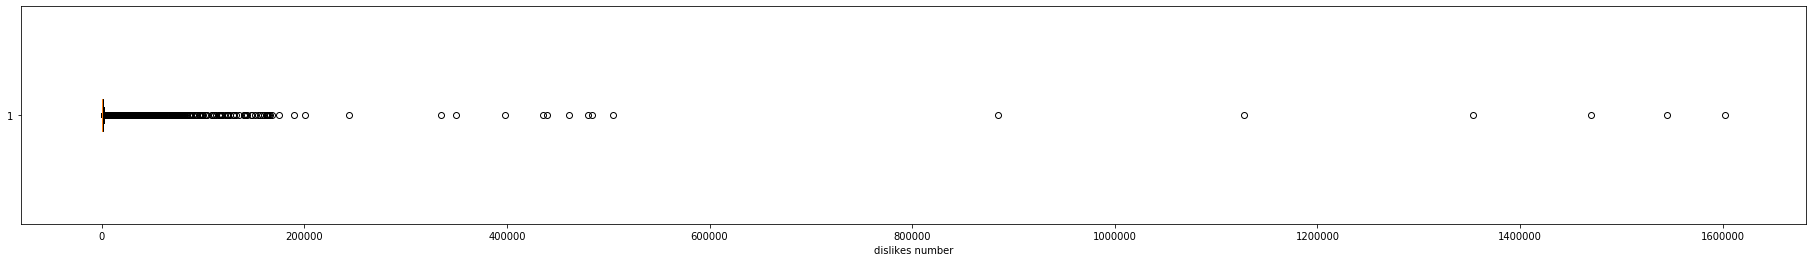

2226.5


In [30]:
# 盒图
CA.box(32,4,'dislikes number')

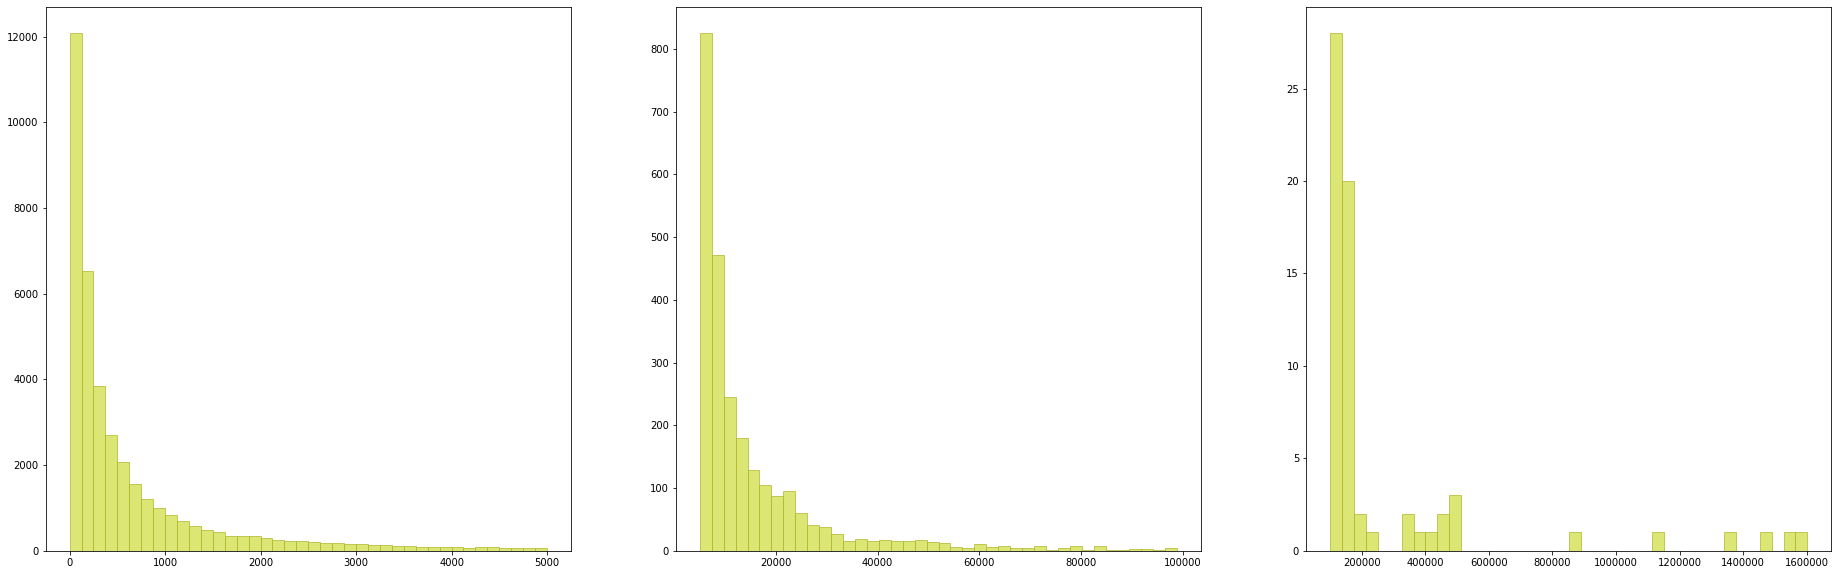

In [31]:
# 分段直方图
CA.seg_hist(5000,100000,32,10,'dislikes number','quantity')

由盒图和直方图可以看出，各个视频间不喜欢数量的差异还是非常明显，数据非常离散：不喜欢量在1000以下的视频占了绝大多数，盒图中表明，超过2227不喜欢数量的点都为离群点。

### 1.7评论数量comment_count(无缺失值)

**数据摘要**

In [32]:
CA.select_col('comment_count')
CA.five_number()

Min: 0
Q1: 417.0
Q2: 1301.0
Q3: 3713.0
Max: 1114800


五数概括：Min=0;Q1=417;Q2=1301;Q3=3713;Max=1114800

**数据分布**

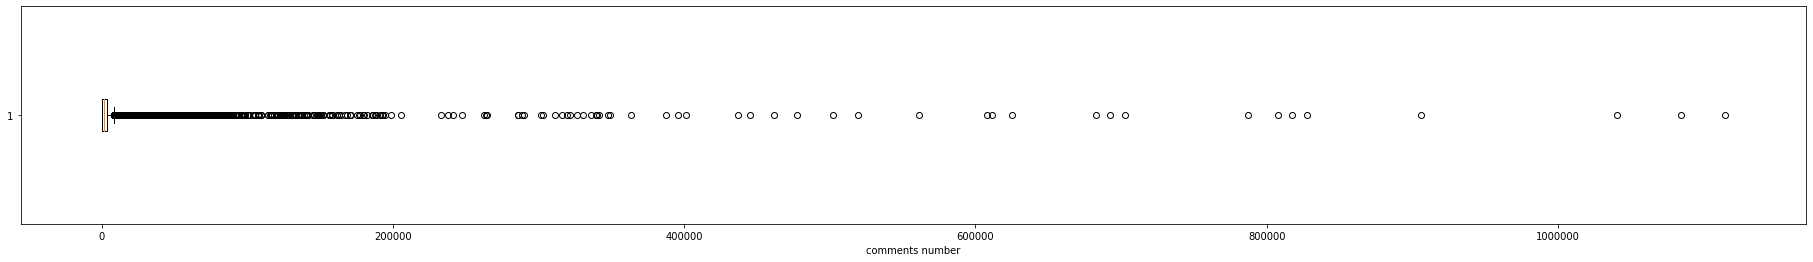

8657.0


In [33]:
# 盒图
CA.box(32,4,'comments number')

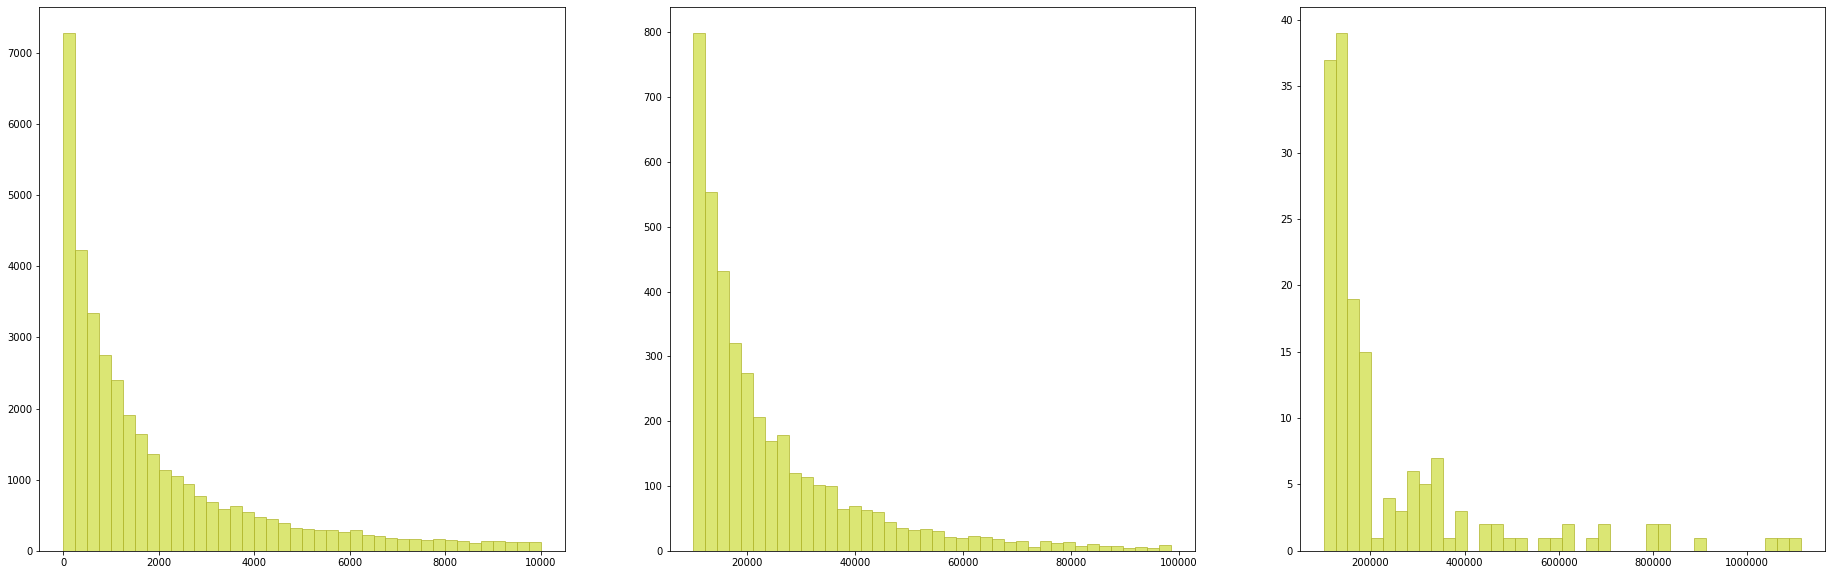

In [34]:
# 分段直方图
CA.seg_hist(10000,100000,32,10,'comments number','quantity')

由盒图和直方图可以看出，各个视频间评论数量的差异非常明显，数据非常离散，同时有一个一般趋势评论量越多，视频数量越少。评论量在4000以下的视频占了绝大多数，盒图中表明，超过8657评论数量的点都为离群点。

### 1.8 禁止评论comments_disabled(无缺失值)

**频数统计**

In [35]:
CA.select_col('comments_disabled')
CA.get_fre()

False    40298
True       583
Name: comments_disabled, dtype: int64


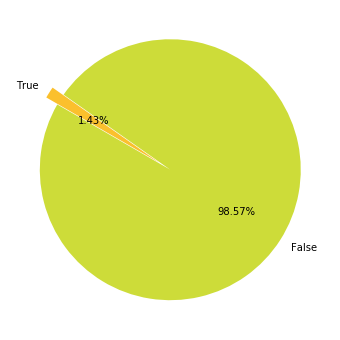

In [36]:
CA.normal_pie(6,6)

98%的视频都支持评论，所有视频中只有583个视频禁止评论。

### 1.9 禁止打分ratings_disabled(无缺失值)

**频数统计**

In [37]:
CA.select_col('ratings_disabled')
CA.get_fre()

False    40602
True       279
Name: ratings_disabled, dtype: int64


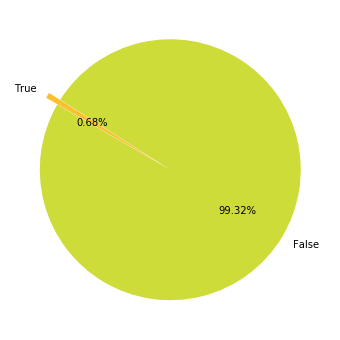

In [38]:
CA.normal_pie(6,6)

99%的视频都支持打分，所有视频中只有279个视频禁止打分。

### 1.10 视频错误或删除video_error_or_removed(无缺失值)

**频数统计**

In [39]:
CA.select_col('video_error_or_removed')
CA.get_fre()

False    40854
True        27
Name: video_error_or_removed, dtype: int64


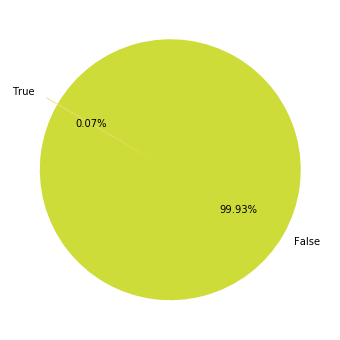

In [40]:
CA.normal_pie(6,6)

几乎所有的视频都没有发生错误或被删除，所有视频中只有27个视频被删除或发生了错误。

### 1.11 视频描述description(有缺失值)

视频描述每个视频都是唯一的，所以无法用频数直方图来表示，视频的描述存在缺失值共1296条，应该是发布者本身就没有上传视频描述

In [41]:
# 填充前缺失值个数
f = [x for x in CA_data['description'] if x == '']
len(f)

1296

利用以下方案对缺失值进行填充：
- 通过属性的相关关系来填补缺失值
对于描述为空的视频，将属性title的值填入对应的description

In [42]:
for i in range(CA_data.shape[0]):
    if(CA_data['description'][i] == ''):
        CA_data.loc[i,'description'] = CA_data.loc[i,'title']

In [43]:
# 填充后缺失值个数
f_a = [x for x in CA_data['description'] if x == '']
len(f_a)

0

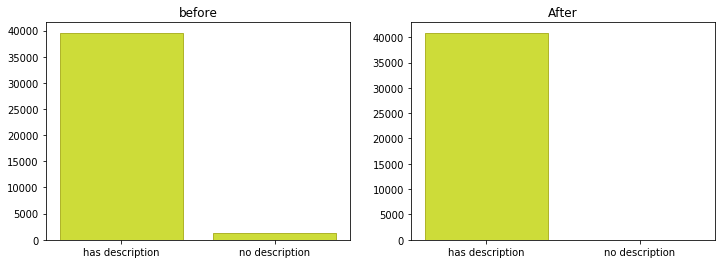

In [44]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('before')
plt.bar(['has description','no description'],[len(CA_data['description'])-len(f),len(f)],facecolor='#cddc39', edgecolor='#afb42b')
plt.subplot(122)
plt.title('After')
plt.bar(['has description','no description'],[len(CA_data['description'])-len(f_a),len(f_a)],facecolor='#cddc39', edgecolor='#afb42b')
plt.show()

## 2 其他国家(DE,FR,GB,IN,US)
### 2.1 流行时间trending_date(无缺失值)
**频数统计**

In [8]:
de = auto.c_data(root,'DEvideos.csv')
fr = auto.c_data(root,'FRvideos.csv')
gb = auto.c_data(root,'GBvideos.csv')
In = auto.c_data(root,'INvideos.csv')
us = auto.c_data(root,'USvideos.csv')

In [10]:
# 德国
de.data['trending_date'].value_counts()

18.10.02    200
17.28.11    200
18.17.03    200
18.21.03    200
18.29.01    200
           ... 
18.17.05    195
18.13.06    193
18.28.05    185
18.10.06    177
18.14.05    171
Name: trending_date, Length: 205, dtype: int64

In [12]:
def show_freq(freq):
    for i in set(freq.values):
        print(i,end=':')
        for j in list(filter(lambda x : freq[x] == i,sorted(freq.index))):
            print(j,end=' ')
        print()

In [13]:
show_freq(de.data['trending_date'].value_counts())

193:18.13.06 
195:18.16.02 18.17.05 
196:18.13.02 18.14.03 18.25.04 18.27.02 
197:18.04.02 18.11.02 18.11.06 18.13.03 18.31.01 18.31.05 
198:18.02.02 18.06.06 18.12.03 18.19.05 18.20.05 18.29.03 
199:17.14.12 17.16.11 18.01.02 18.02.03 18.02.05 18.03.02 18.04.01 18.05.02 18.05.05 18.06.02 18.08.03 18.08.06 18.12.02 18.12.06 18.14.04 18.15.02 18.15.03 18.15.04 18.17.01 18.17.02 18.20.03 18.21.02 18.22.02 18.22.03 18.24.02 18.25.01 18.26.02 18.28.01 18.28.03 18.30.04 
200:17.01.12 17.02.12 17.03.12 17.04.12 17.05.12 17.06.12 17.07.12 17.08.12 17.09.12 17.10.12 17.11.12 17.12.12 17.13.12 17.14.11 17.15.11 17.15.12 17.16.12 17.17.11 17.17.12 17.18.11 17.18.12 17.19.11 17.19.12 17.20.11 17.20.12 17.21.11 17.21.12 17.22.11 17.22.12 17.23.11 17.23.12 17.24.11 17.24.12 17.25.11 17.25.12 17.26.11 17.26.12 17.27.11 17.27.12 17.28.11 17.28.12 17.29.11 17.29.12 17.30.11 17.30.12 17.31.12 18.01.01 18.01.03 18.01.04 18.01.05 18.01.06 18.02.01 18.02.04 18.02.06 18.03.01 18.03.03 18.03.04 18.03.05 18.

In [14]:
# 法国
show_freq(fr.data['trending_date'].value_counts())

193:18.23.05 
195:18.14.02 18.14.03 18.16.02 18.24.02 18.25.04 
196:18.01.03 18.11.02 18.13.03 18.15.02 18.16.05 18.23.03 18.27.03 
197:18.05.02 18.07.04 18.12.02 18.13.02 18.14.05 18.15.03 18.19.05 18.21.05 18.26.03 
198:18.01.04 18.02.03 18.02.04 18.03.04 18.04.04 18.05.04 18.06.02 18.06.04 18.09.03 18.16.03 18.17.02 18.17.03 18.18.02 18.19.03 18.20.03 18.22.03 18.22.05 18.23.02 18.28.03 18.30.03 18.31.01 
199:17.18.11 17.20.12 17.25.12 17.27.12 17.30.11 18.01.06 18.02.02 18.03.01 18.03.02 18.03.03 18.04.03 18.04.05 18.06.03 18.07.03 18.07.05 18.08.02 18.09.02 18.10.02 18.11.03 18.12.03 18.18.03 18.18.05 18.19.02 18.20.02 18.20.04 18.21.02 18.22.01 18.22.02 18.23.04 18.24.01 18.25.02 18.28.02 18.29.03 18.29.04 18.30.01 18.31.03 
200:17.01.12 17.02.12 17.03.12 17.04.12 17.05.12 17.06.12 17.07.12 17.08.12 17.09.12 17.10.12 17.11.12 17.12.12 17.13.12 17.14.11 17.14.12 17.15.11 17.15.12 17.16.11 17.16.12 17.17.11 17.17.12 17.18.12 17.19.11 17.19.12 17.20.11 17.21.11 17.21.12 17.22.11 17.

In [15]:
# 英国
show_freq(gb.data['trending_date'].value_counts())

148:18.15.05 
152:18.22.05 
153:18.23.05 
154:18.21.05 
155:18.24.05 
156:18.20.05 
158:18.17.05 
160:18.06.05 18.11.05 
161:18.07.05 18.19.05 18.25.05 
162:18.01.05 18.03.05 18.08.05 
163:18.03.06 
164:18.02.06 18.04.06 18.09.05 18.14.05 18.30.05 
165:18.02.05 18.10.05 18.13.05 18.14.06 18.29.05 18.30.04 
166:18.04.05 18.05.05 18.05.06 18.11.06 18.18.05 
167:18.01.06 18.12.05 
168:18.10.06 
169:18.08.06 18.27.05 18.28.05 
170:18.13.06 
171:18.06.06 18.12.06 18.31.05 
172:18.07.06 18.29.04 
173:18.26.05 
174:18.09.06 
177:18.22.04 
178:18.23.04 
179:18.19.04 
180:18.17.04 18.20.04 
181:18.16.04 
182:18.01.04 18.02.04 18.21.04 
183:18.18.04 18.28.04 
185:18.15.04 18.24.04 
186:18.30.03 
187:18.26.04 18.27.04 18.29.03 
188:18.04.04 18.25.04 18.31.03 
191:18.03.04 18.14.04 
193:18.16.03 18.18.03 18.26.03 18.28.03 
194:18.05.04 
196:18.20.03 
197:18.07.04 18.19.03 18.25.03 
198:17.01.12 18.16.05 18.27.03 
199:17.02.12 17.03.12 17.06.12 17.15.11 17.16.11 18.01.02 18.02.02 18.03.02 18.04.02 

In [16]:
# 印度
show_freq(In.data['trending_date'].value_counts())

152:17.20.12 18.04.03 18.26.03 
154:18.03.02 
155:18.07.03 18.16.05 18.21.03 
156:18.25.03 
158:18.02.04 18.05.03 
161:18.08.03 
162:18.01.03 18.25.02 
163:17.27.12 18.01.02 18.21.02 
164:18.06.02 18.06.03 18.22.02 18.26.02 
165:17.22.11 17.29.12 18.23.02 
166:18.16.03 18.24.03 18.30.01 
167:18.02.03 18.19.02 
168:17.08.12 17.28.12 18.24.02 
169:18.05.02 18.09.01 18.29.01 
170:17.07.12 18.06.01 18.09.02 18.13.06 18.28.03 
171:18.04.02 18.07.06 18.16.02 18.23.03 
172:18.11.03 18.14.06 18.19.05 18.20.02 18.28.02 
173:18.02.02 18.12.06 18.14.02 
174:18.01.06 18.02.05 18.10.03 18.13.03 18.14.03 18.20.05 
175:17.21.11 18.06.06 18.12.03 18.28.05 
176:18.07.02 18.10.02 18.21.05 18.29.05 
177:17.19.12 18.03.05 18.12.02 18.26.04 18.26.05 18.28.01 
178:18.18.01 18.24.05 
179:18.05.01 18.05.06 18.18.02 18.19.01 
180:17.29.11 18.01.05 18.10.05 18.15.02 18.17.05 18.19.04 18.20.04 
181:18.03.06 18.11.02 18.11.06 18.17.02 18.27.05 
182:17.25.12 18.04.06 18.16.01 18.16.04 18.17.04 18.30.05 
183:17.02.

In [17]:
# 美国
show_freq(us.data['trending_date'].value_counts())

196:18.02.02 18.03.02 18.04.02 
197:18.01.02 18.31.01 
198:18.12.02 18.14.03 18.16.03 18.17.03 18.27.02 
199:18.03.03 18.04.03 18.05.02 18.06.02 18.07.02 18.07.03 18.08.03 18.12.03 18.13.02 18.13.03 18.14.02 18.15.02 18.15.03 18.15.05 18.18.03 18.19.03 18.20.03 18.22.02 18.23.02 18.26.02 18.27.03 18.28.02 18.29.01 
200:17.01.12 17.02.12 17.03.12 17.04.12 17.05.12 17.06.12 17.07.12 17.08.12 17.09.12 17.10.12 17.11.12 17.12.12 17.13.12 17.14.11 17.14.12 17.15.11 17.15.12 17.16.11 17.16.12 17.17.11 17.17.12 17.18.11 17.18.12 17.19.11 17.19.12 17.20.11 17.20.12 17.21.11 17.21.12 17.22.11 17.22.12 17.23.11 17.23.12 17.24.11 17.24.12 17.25.11 17.25.12 17.26.11 17.26.12 17.27.11 17.27.12 17.28.11 17.28.12 17.29.11 17.29.12 17.30.11 17.30.12 17.31.12 18.01.01 18.01.03 18.01.04 18.01.05 18.01.06 18.02.01 18.02.03 18.02.04 18.02.05 18.02.06 18.03.01 18.03.04 18.03.05 18.03.06 18.04.01 18.04.04 18.04.05 18.04.06 18.05.01 18.05.03 18.05.04 18.05.05 18.05.06 18.06.01 18.06.03 18.06.04 18.06.05 18.0

### 2.2 类别category_id(存在间接缺失值)

In [23]:
de_list = get_category_list(root,'DE_category_id.json')
fr_list = get_category_list(root,'FR_category_id.json')
gb_list = get_category_list(root,'GB_category_id.json')
In_list = get_category_list(root,'IN_category_id.json')
us_list = get_category_list(root,'US_category_id.json')

In [24]:
def get_cate(data,lst):
    cate = []
    for i in data['category_id'].values:
        if(str(i) in lst.keys()):
            cate.append(lst[str(i)])
        else:
            cate.append('unknown')
    return cate

In [26]:
cate = get_cate(de.data,de_list)

**频数统计**

In [29]:
def cate_hist(cate,title):
    fig = plt.figure(figsize=(32, 6))
    plt.title(title)
    plt.hist(np.array(cate), bins=40, facecolor="#cddc39", edgecolor="#afb42b", alpha=0.7)
    plt.xlabel('category')
    plt.ylabel('quantity')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


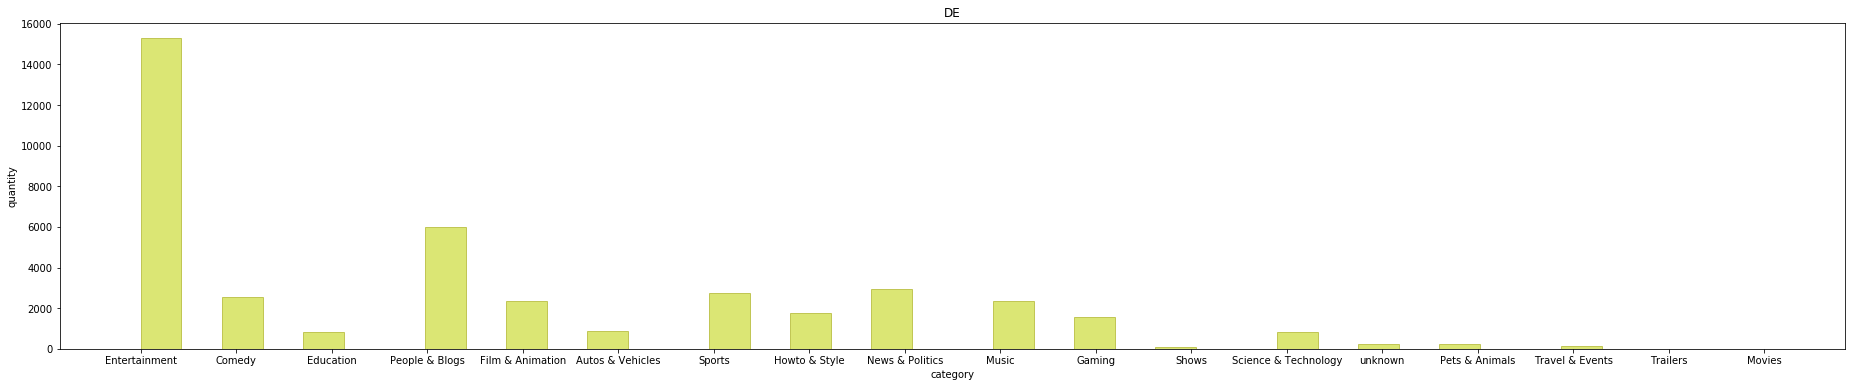

In [31]:
from matplotlib import pyplot as plt
%pylab inline
# 德国
cate_hist(cate,'DE')

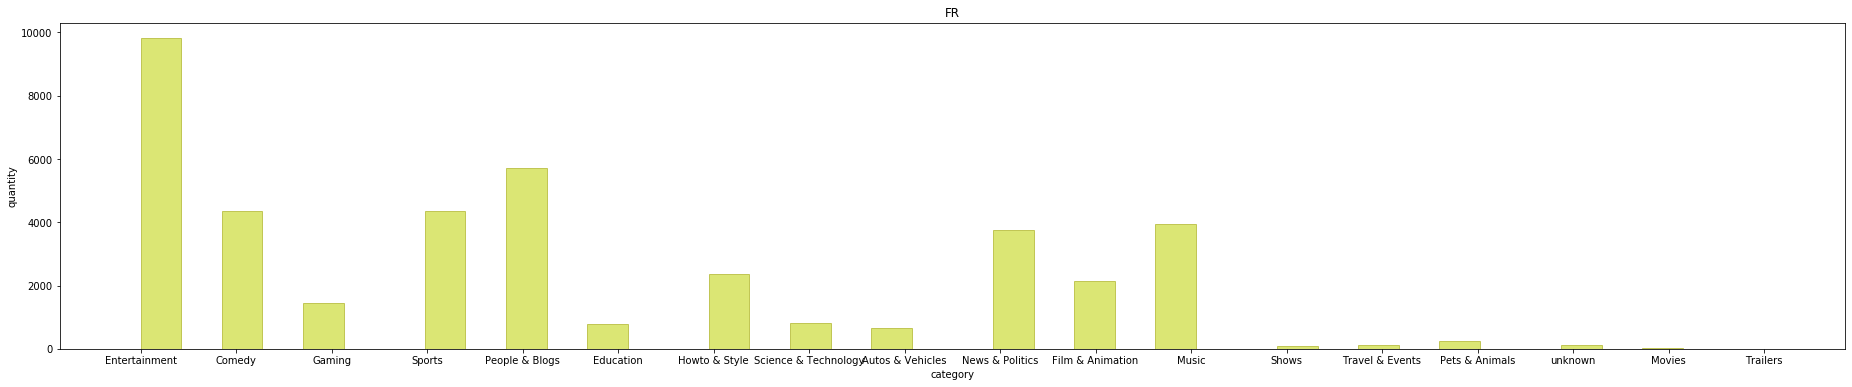

In [32]:
# 法国
cate = get_cate(fr.data,fr_list)
cate_hist(cate,'FR')

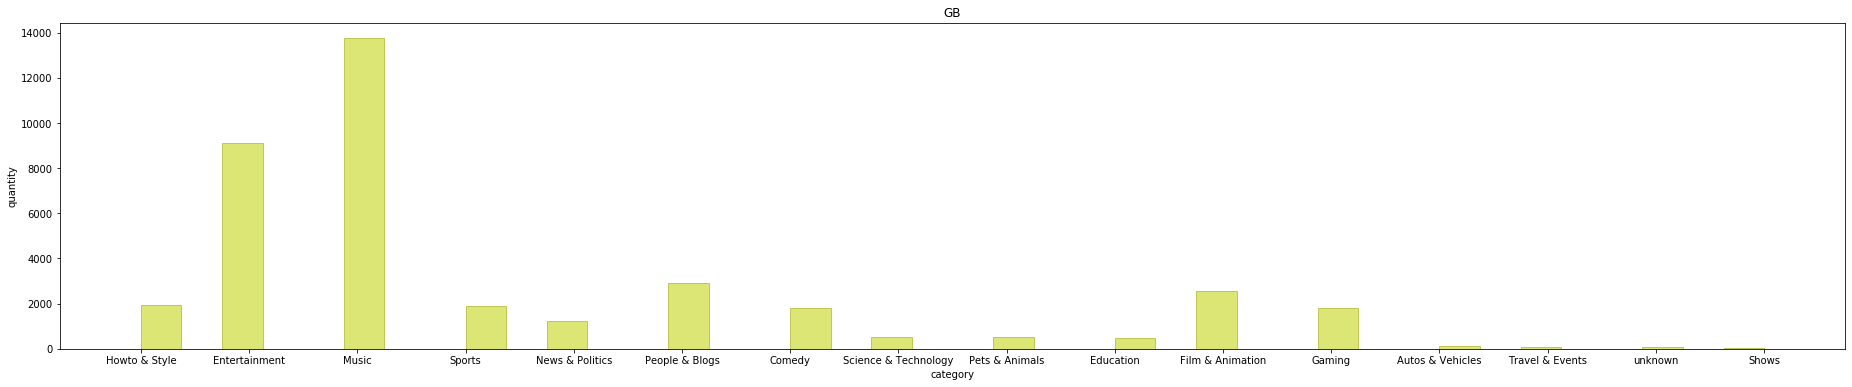

In [33]:
# 英国
cate = get_cate(gb.data,gb_list)
cate_hist(cate,'GB')

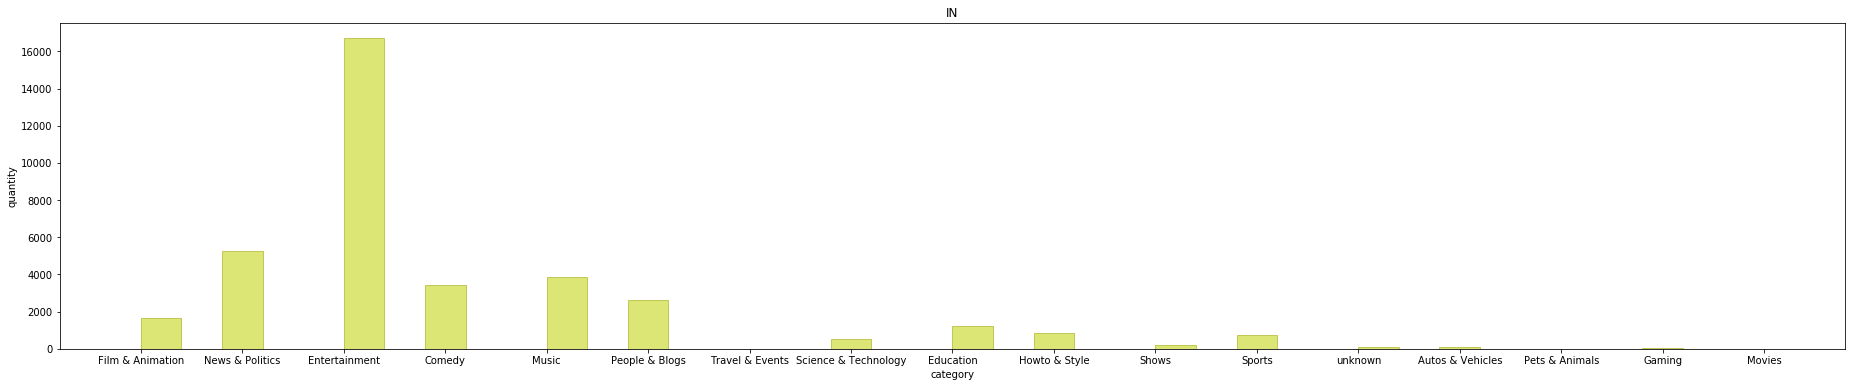

In [34]:
# 印度
cate = get_cate(In.data,In_list)
cate_hist(cate,'IN')

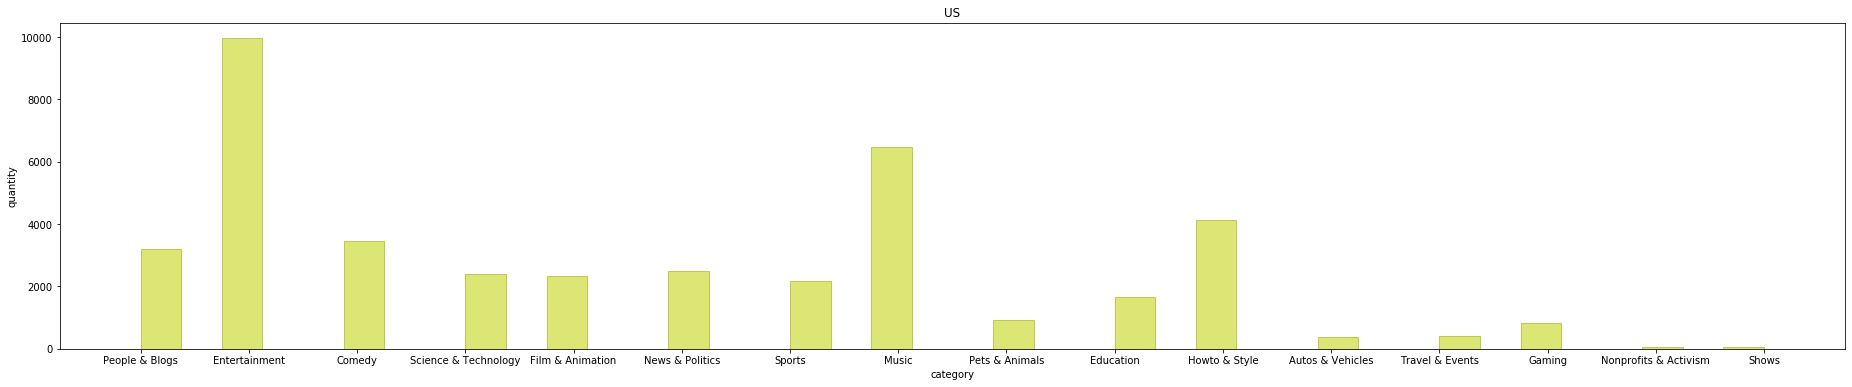

In [35]:
# 美国
cate = get_cate(us.data,us_list)
cate_hist(cate,'US')

### 2.3 标签tags(存在缺失值)
tags如果不进行tag提取，则每一项是唯一值，原数据集存在缺失值，原因应该是博主本身就没有添加tag。可以通过以下方式进行缺失值的填充。
- 通过属性的相关关系来填补缺失值

即将“title”属性或“description”属性分词后作为tag填充。

In [37]:
# 德国
de.select_col('tags')
n_b = de.count_none('[none]')

3031


In [38]:
de.fill_none('title',none_token='[none]')
n_a = de.count_none('[none]')

0


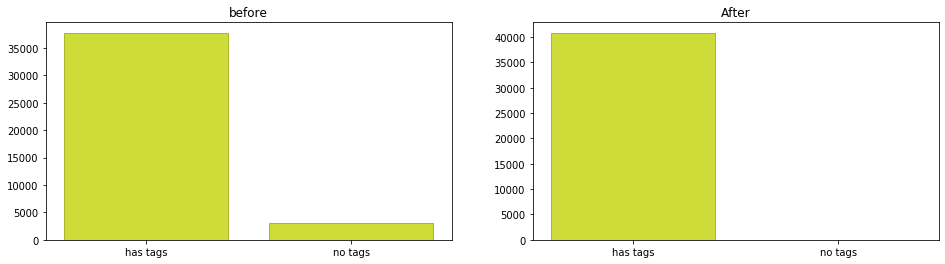

In [39]:
de.normal_bar(16,4,n_b,n_a,['has tags','no tags'])

In [40]:
# 法国
fr.select_col('tags')
n_b = fr.count_none('[none]')

5304


In [41]:
fr.fill_none('title',none_token='[none]')
n_a = fr.count_none('[none]')

0


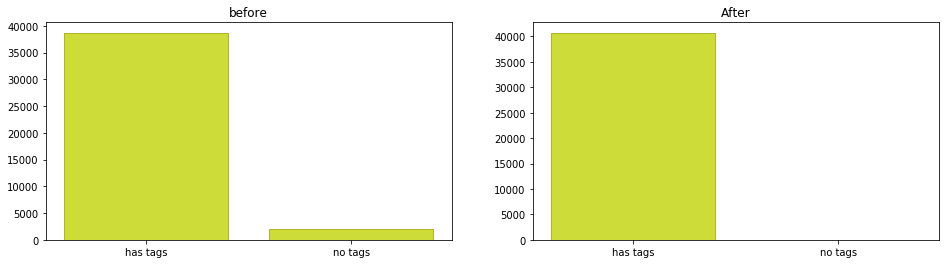

In [43]:
fr.normal_bar(16,4,n_b,n_a,['has tags','no tags'])

In [42]:
# 英国
gb.select_col('tags')
n_b = gb.count_none('[none]')

2010


In [44]:
gb.fill_none('title',none_token='[none]')
n_a = gb.count_none('[none]')

0


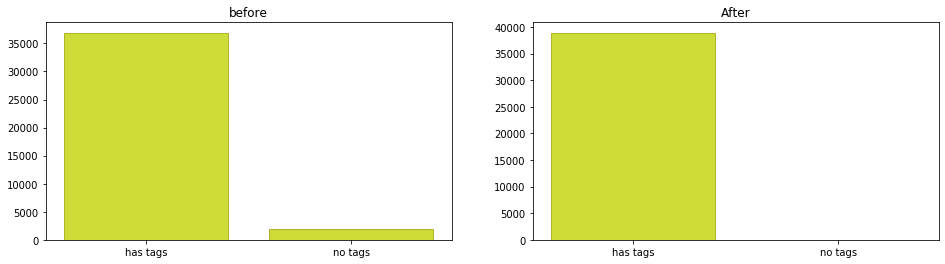

In [45]:
gb.normal_bar(16,4,n_b,n_a,['has tags','no tags'])

In [46]:
# 印度
In.select_col('tags')
n_b = In.count_none('[none]')

1381


In [47]:
In.fill_none('title',none_token='[none]')
n_a = In.count_none('[none]')

0


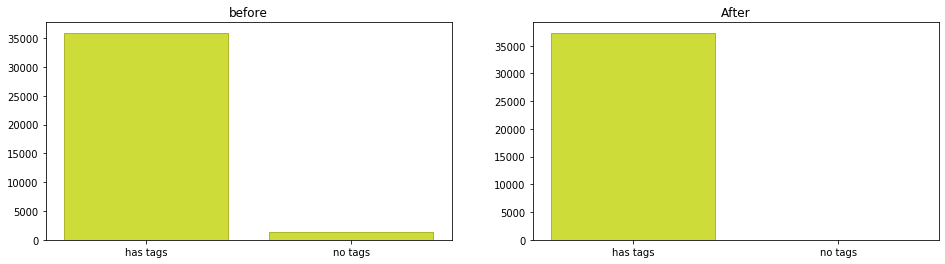

In [48]:
In.normal_bar(16,4,n_b,n_a,['has tags','no tags'])

In [49]:
# 美国
us.select_col('tags')
n_b = us.count_none('[none]')

1535


In [50]:
us.fill_none('title',none_token='[none]')
n_a = us.count_none('[none]')

0


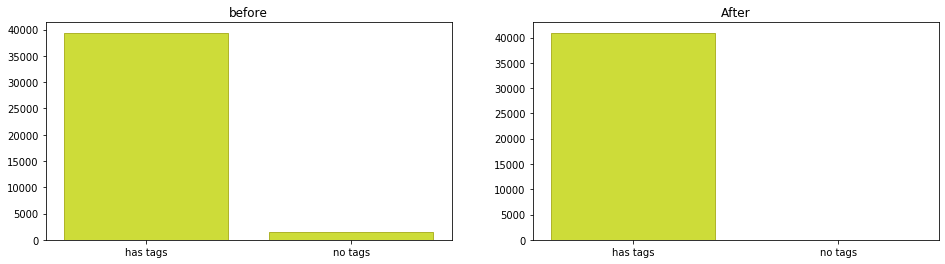

In [51]:
us.normal_bar(16,4,n_b,n_a,['has tags','no tags'])

### 2.4 观看数量views(无缺失值)
**数据摘要**

In [53]:
# 德国
de.select_col('views')
de.five_number()

Min: 518
Q1: 27068.75
Q2: 119277.0
Q3: 443101.5
Max: 113876217


In [54]:
# 法国
fr.select_col('views')
fr.five_number()

Min: 223
Q1: 16974.5
Q2: 73721.0
Q3: 270808.75
Max: 100911567


In [55]:
# 英国
gb.select_col('views')
gb.five_number()

Min: 851
Q1: 251527.25
Q2: 981889.0
Q3: 3683628.5
Max: 424538912


In [56]:
# 印度
In.select_col('views')
In.five_number()

Min: 4024
Q1: 123915.5
Q2: 304586.0
Q3: 799291.25
Max: 125432237


In [57]:
# 美国
us.select_col('views')
us.five_number()

Min: 549
Q1: 242329.0
Q2: 681861.0
Q3: 1823157.0
Max: 225211923


**数据分布**

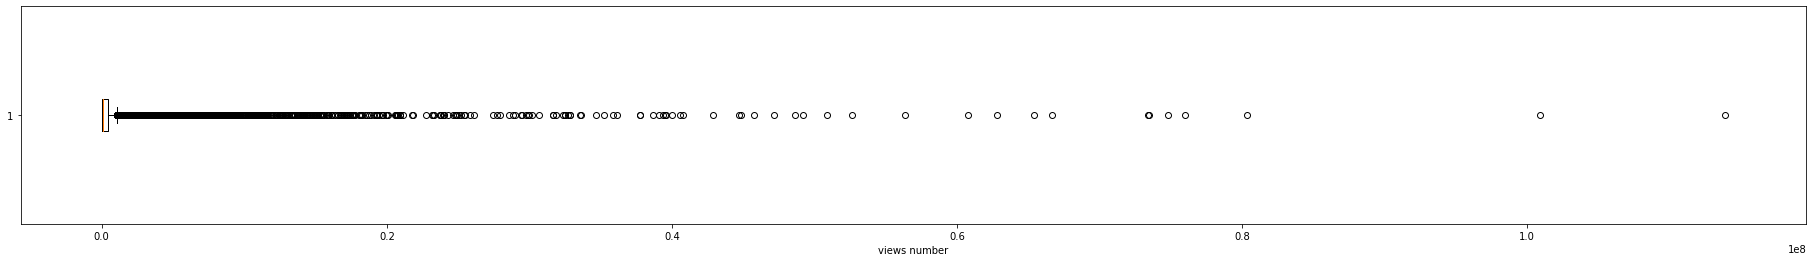

1067150.625


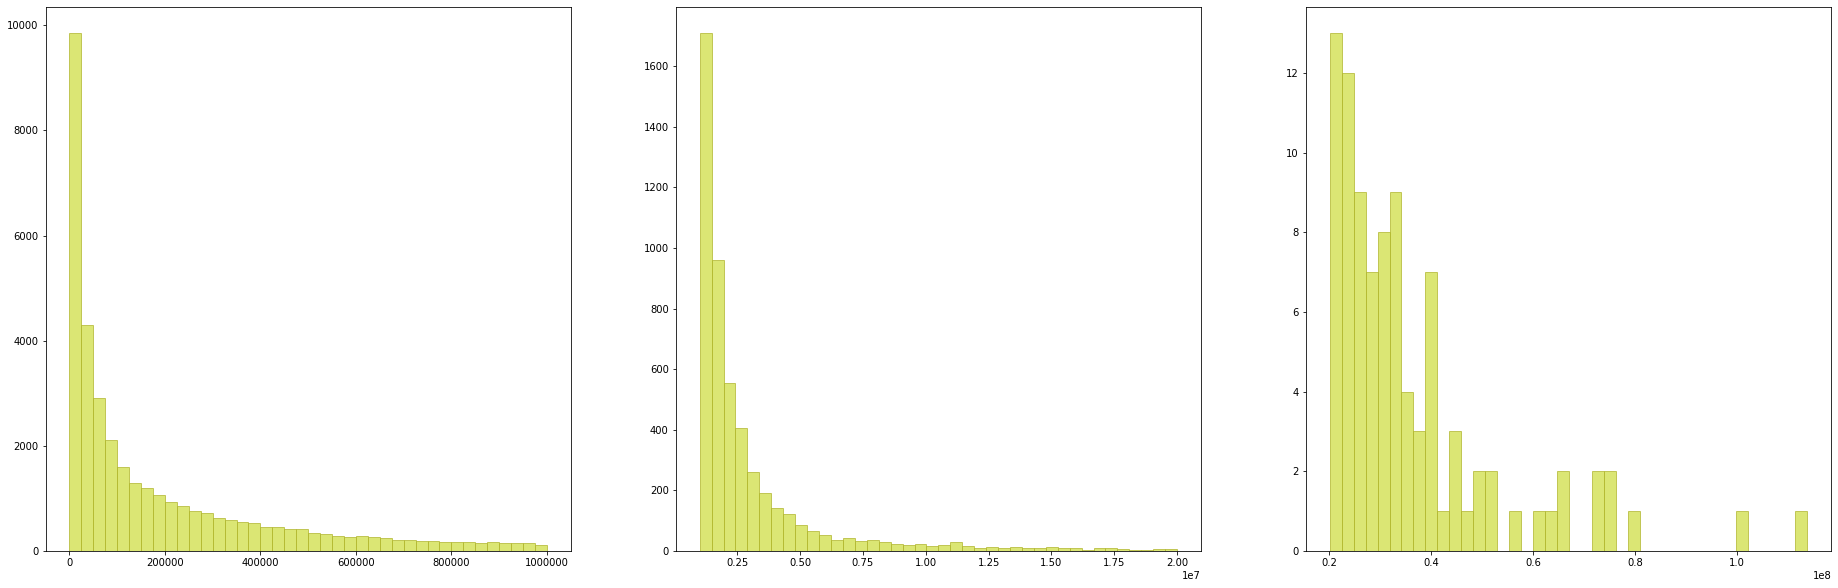

In [66]:
# 德国
de.box(32,4,'views number')
de.seg_hist(1000000,20000000,32,10,'views number','quantity')

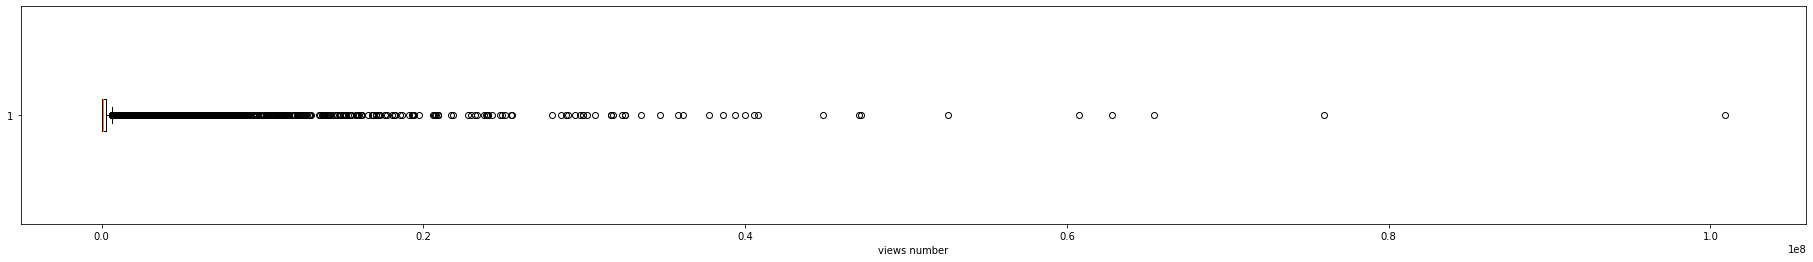

651560.125


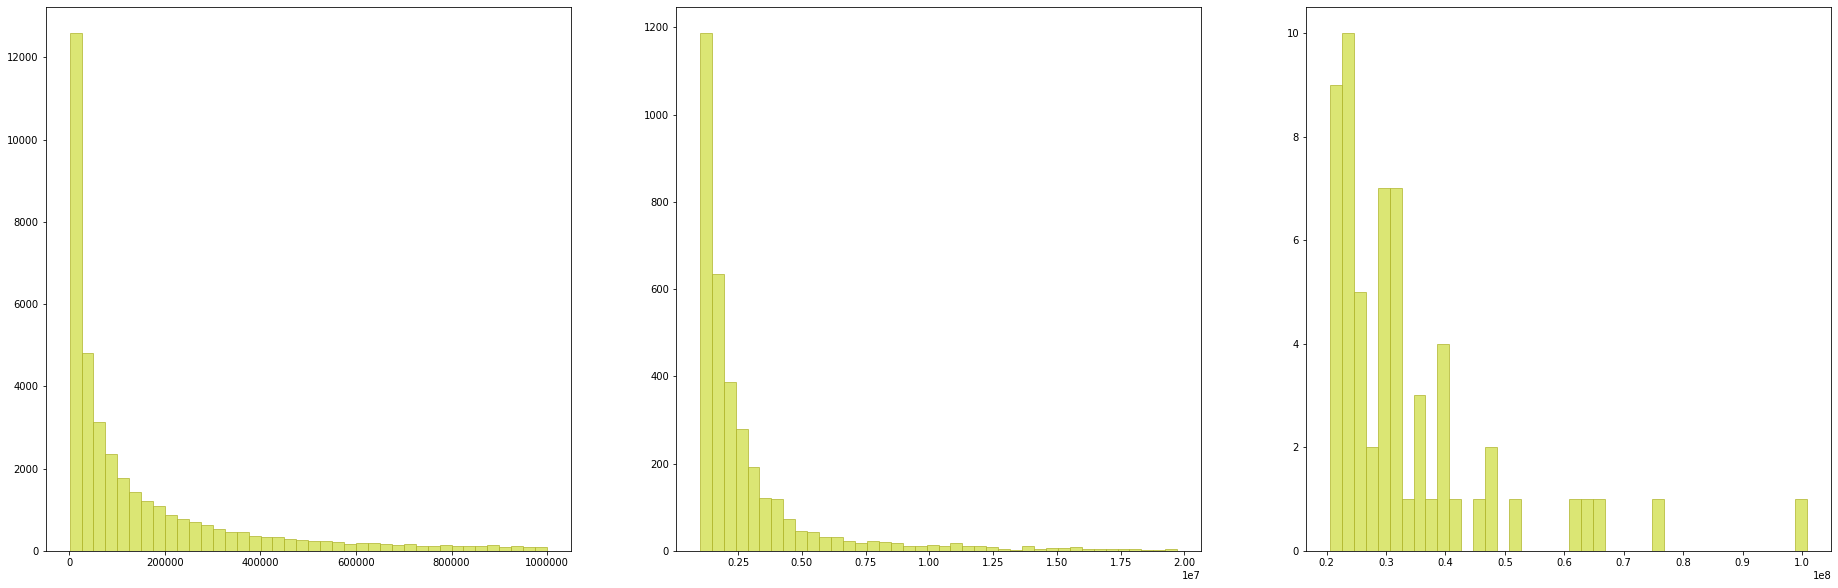

In [67]:
# 法国
fr.box(32,4,'views number')
fr.seg_hist(1000000,20000000,32,10,'views number','quantity')

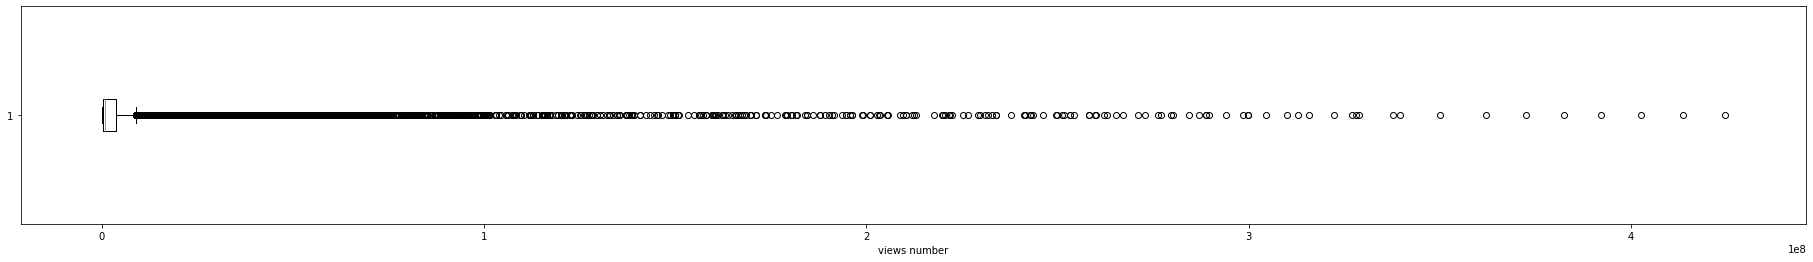

8831780.375


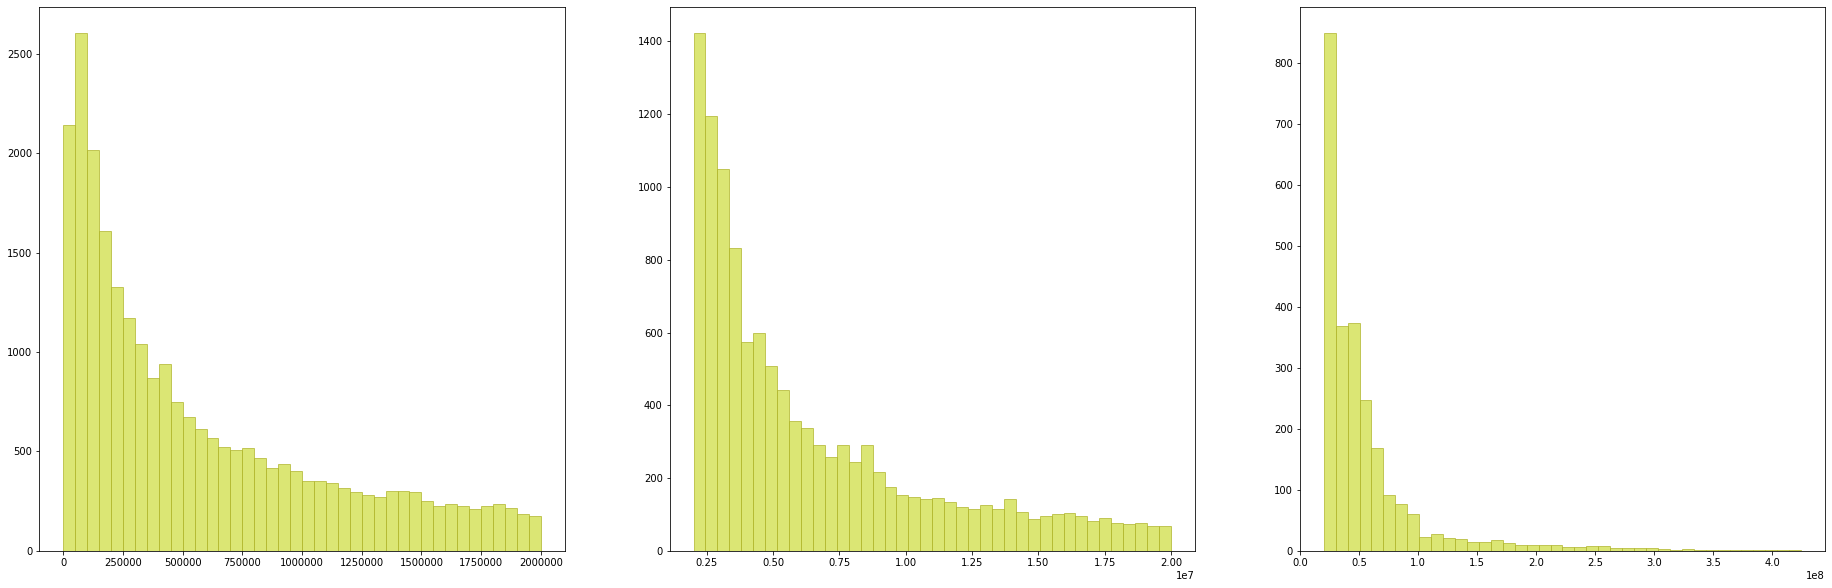

In [70]:
# 英国
gb.box(32,4,'views number')
gb.seg_hist(2000000,20000000,32,10,'views number','quantity')

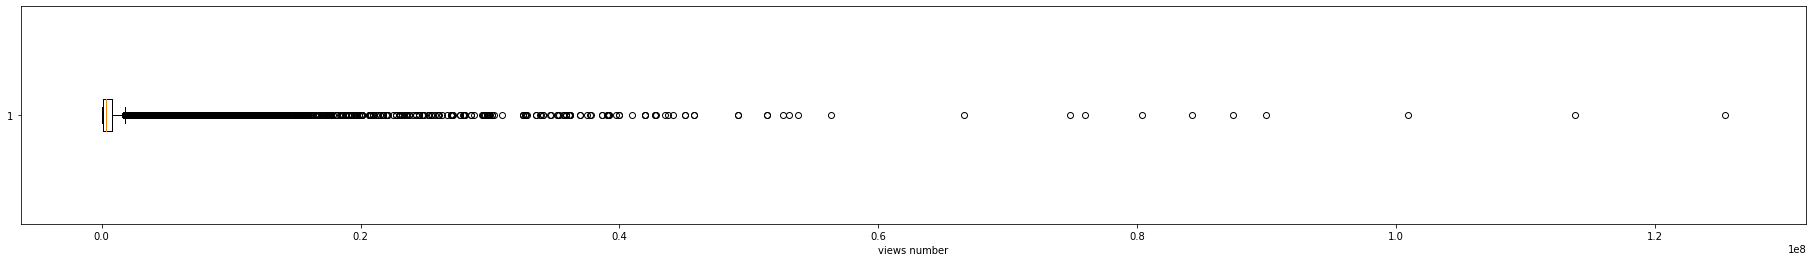

1812354.875


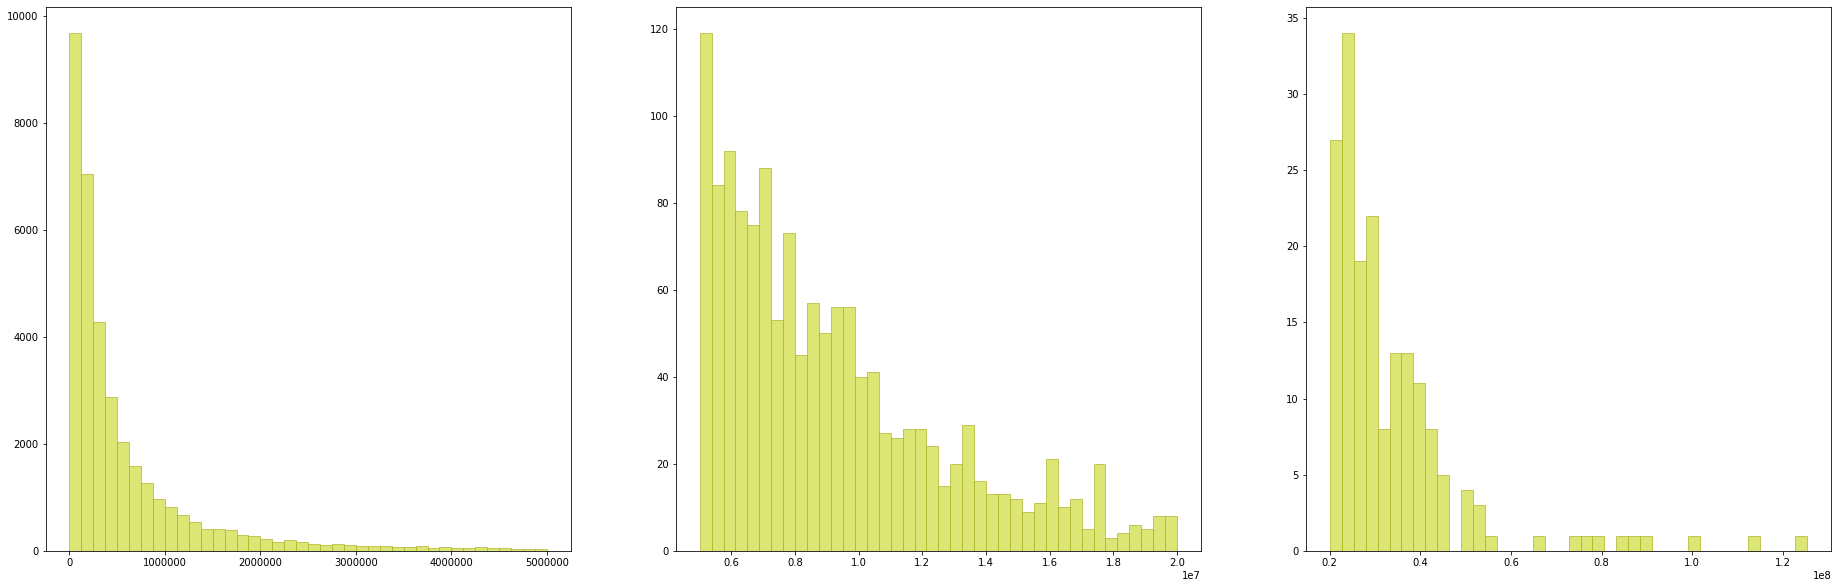

In [75]:
# 印度
In.box(32,4,'views number')
In.seg_hist(5000000,20000000,32,10,'views number','quantity')

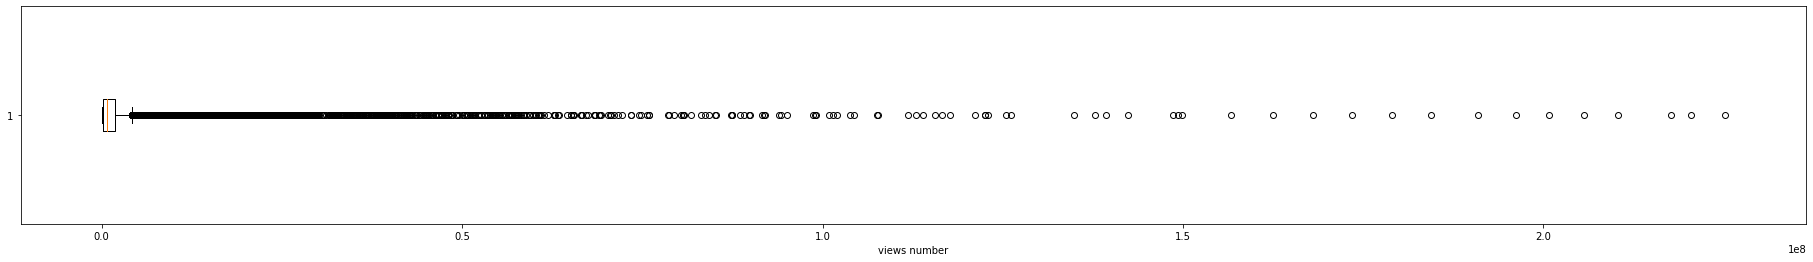

4194399.0


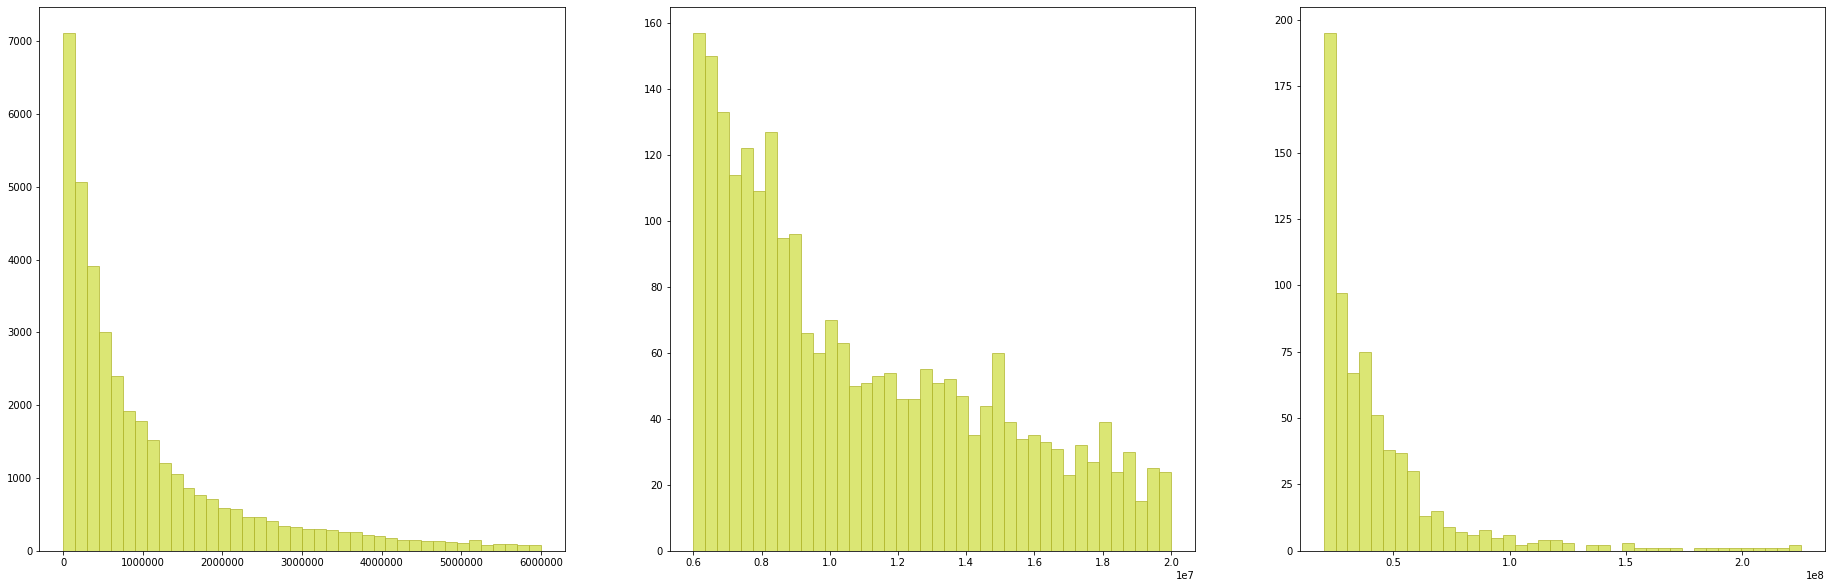

In [76]:
# 美国
us.box(32,4,'views number')
us.seg_hist(6000000,20000000,32,10,'views number','quantity')

### 2.5 喜欢数量likes(无缺失值)

**数据摘要**

In [77]:
# 德国
de.select_col('likes')
de.five_number()

Min: 0
Q1: 533.0
Q2: 2699.0
Q3: 11796.25
Max: 4924056


In [78]:
# 法国
fr.select_col('likes')
fr.five_number()

Min: 0
Q1: 338.0
Q2: 1892.5
Q3: 7969.5
Max: 4750254


In [79]:
# 英国
gb.select_col('likes')
gb.five_number()

Min: 0
Q1: 5897.0
Q2: 25182.5
Q3: 114089.25
Max: 5613827


In [80]:
# 印度
In.select_col('likes')
In.five_number()

Min: 0
Q1: 864.0
Q2: 3069.0
Q3: 13774.25
Max: 2912710


In [81]:
# 美国
us.select_col('likes')
us.five_number()

Min: 0
Q1: 5424.0
Q2: 18091.0
Q3: 55417.0
Max: 5613827


**数据分布**

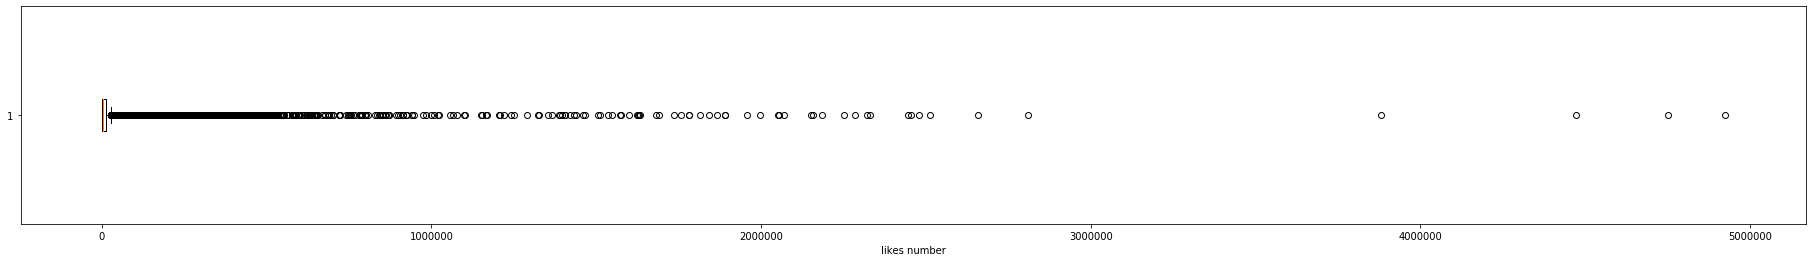

28691.125


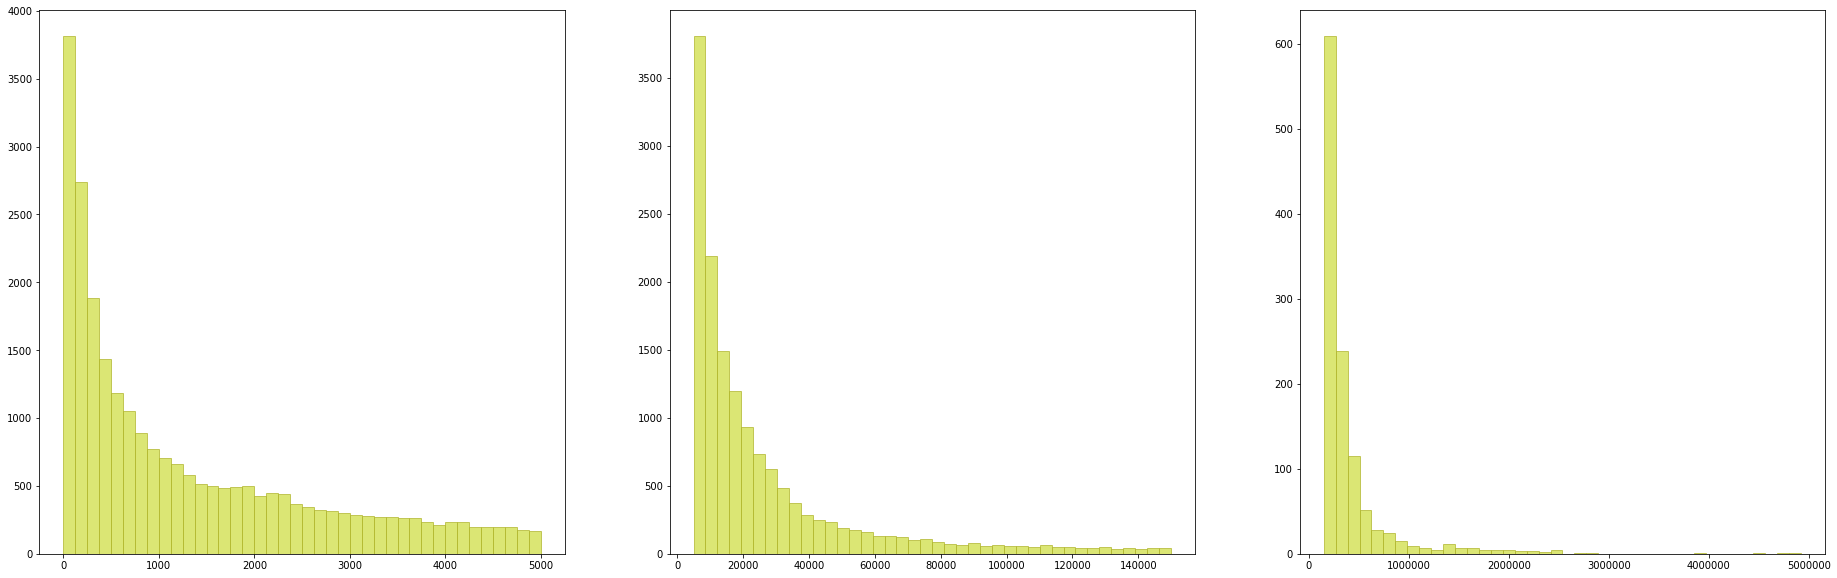

In [85]:
# 德国
de.box(32,4,'likes number')
de.seg_hist(5000,150000,32,10,'likes number','quantity')

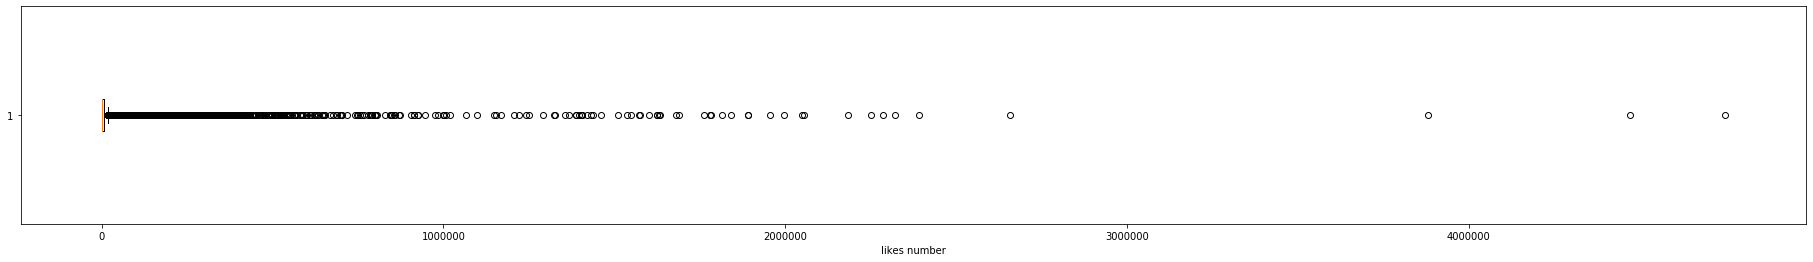

19416.75


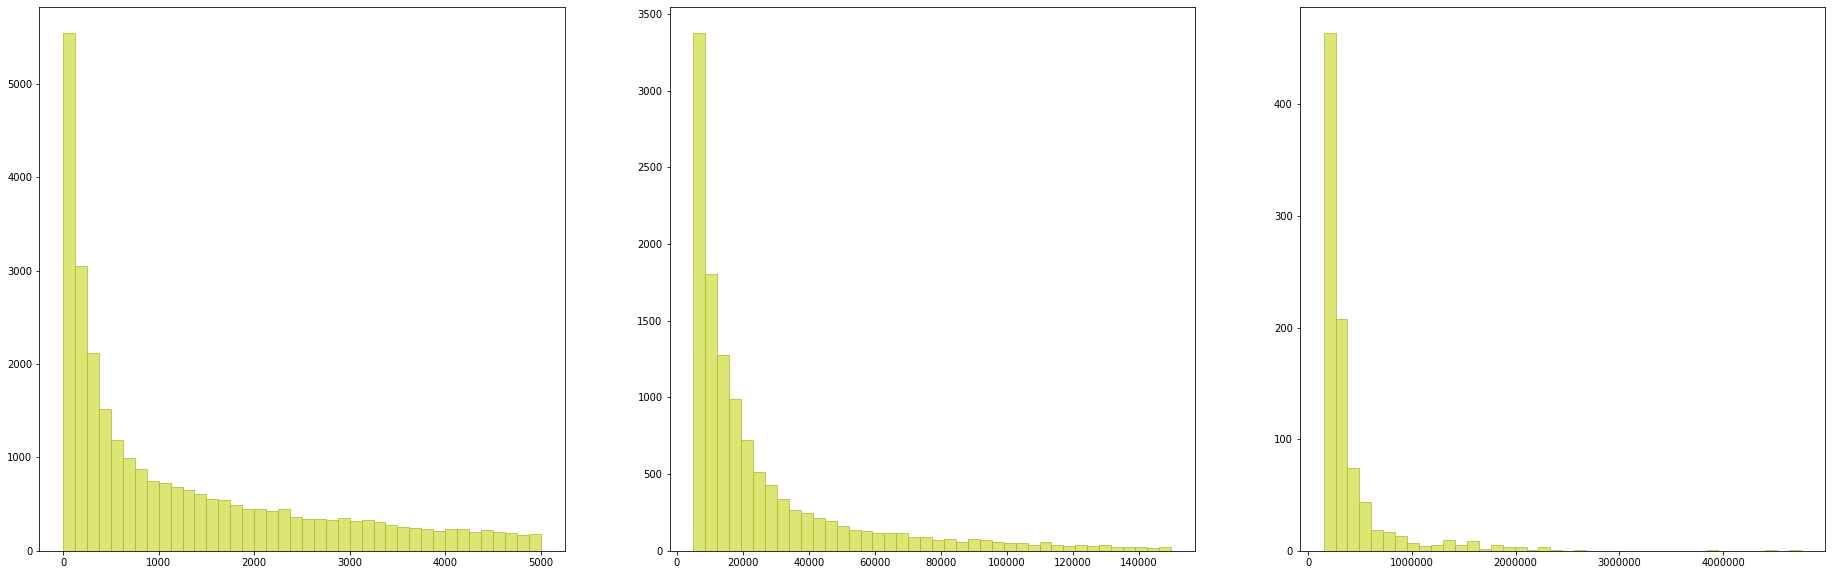

In [86]:
# 法国
fr.box(32,4,'likes number')
fr.seg_hist(5000,150000,32,10,'likes number','quantity')

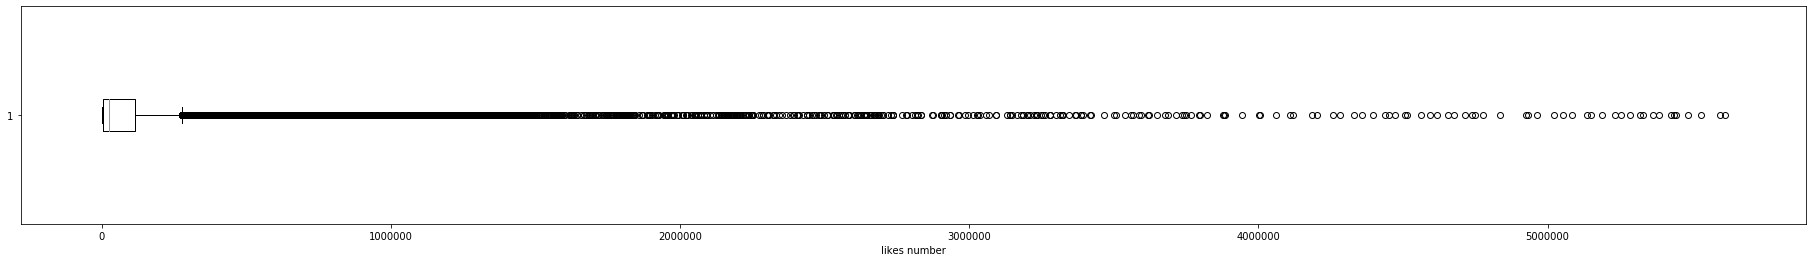

276377.625


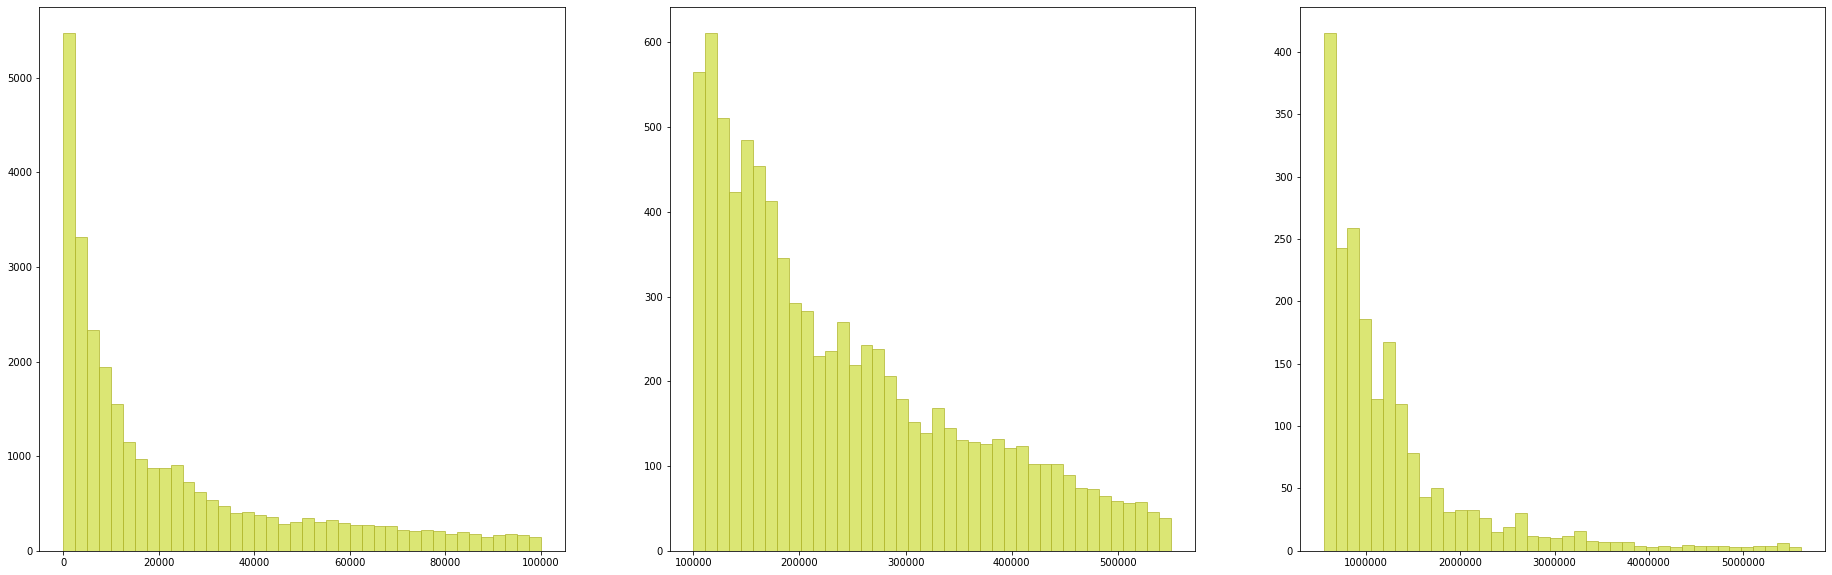

In [91]:
# 英国
gb.box(32,4,'likes number')
gb.seg_hist(100000,550000,32,10,'likes number','quantity')

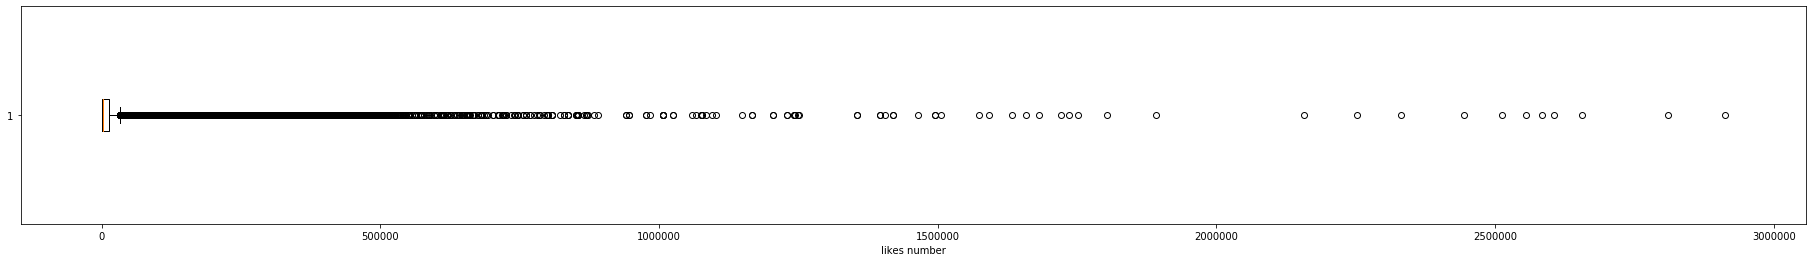

33139.625


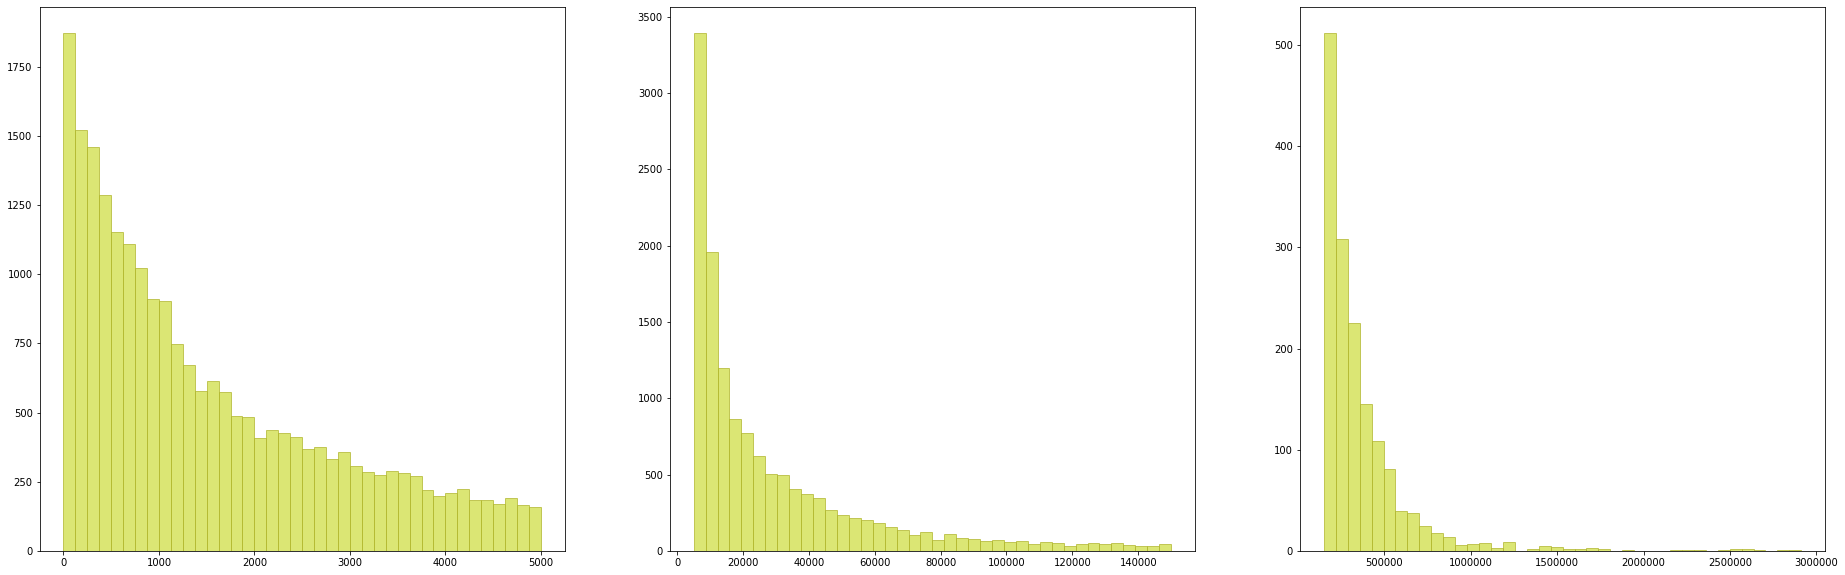

In [92]:
# 印度
In.box(32,4,'likes number')
In.seg_hist(5000,150000,32,10,'likes number','quantity')

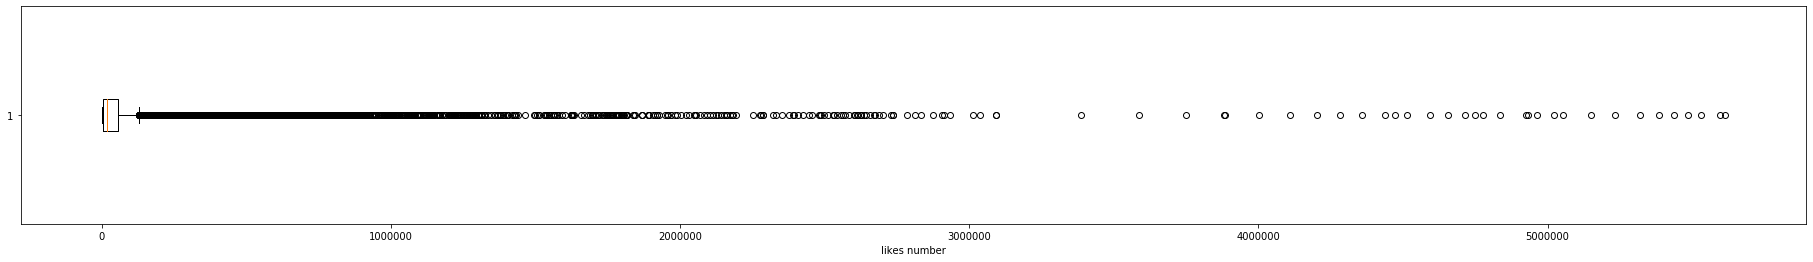

130406.5


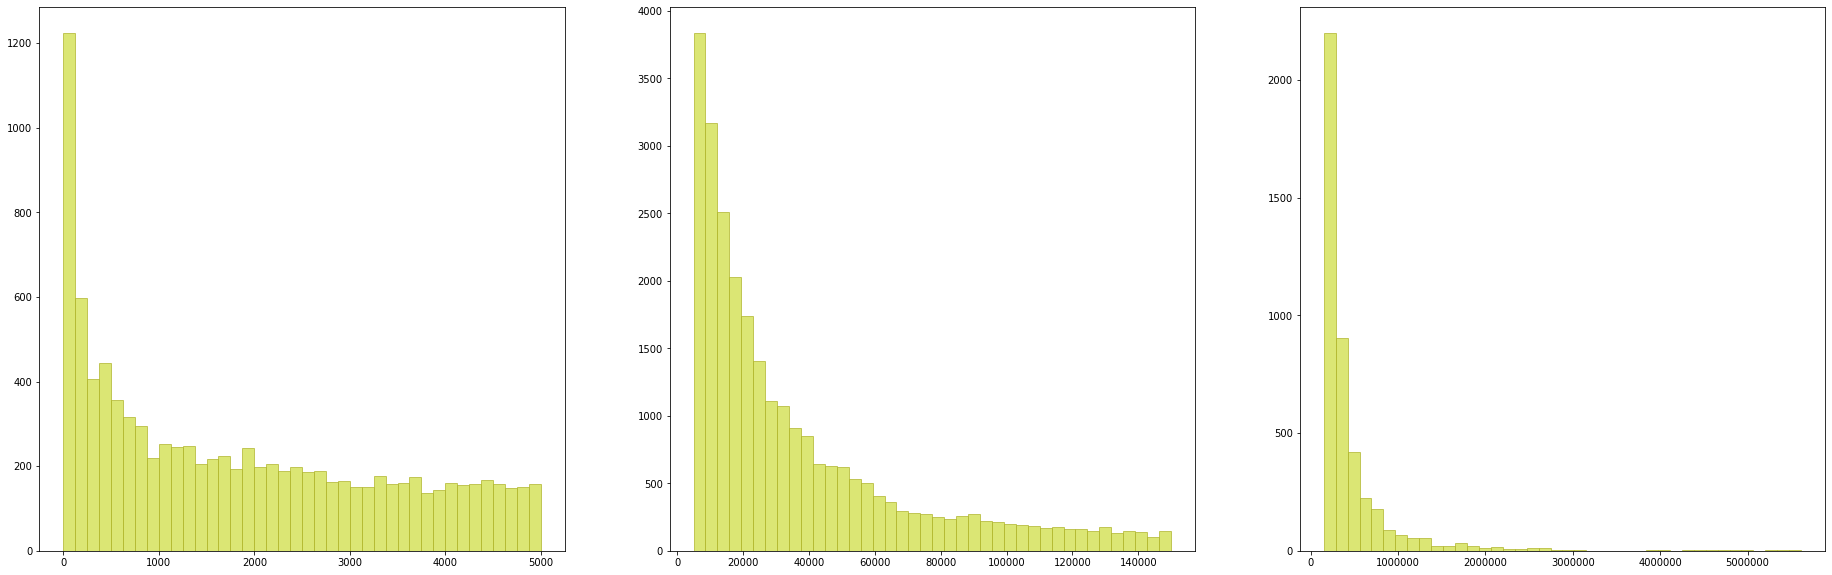

In [93]:
# 美国
us.box(32,4,'likes number')
us.seg_hist(5000,150000,32,10,'likes number','quantity')

### 2.6 不喜欢数量dislikes(无缺失值)

**数据摘要**

In [94]:
# 德国
de.select_col('dislikes')
de.five_number()

Min: 0
Q1: 29.0
Q2: 134.0
Q3: 532.0
Max: 1470386


In [95]:
# 法国
fr.select_col('dislikes')
fr.five_number()

Min: 0
Q1: 18.0
Q2: 83.0
Q3: 335.0
Max: 1353661


In [96]:
# 英国
gb.select_col('dislikes')
gb.five_number()

Min: 0
Q1: 200.0
Q2: 821.0
Q3: 3357.5
Max: 1944971


In [97]:
# 印度
In.select_col('dislikes')
In.five_number()

Min: 0
Q1: 108.0
Q2: 326.0
Q3: 1019.25
Max: 1545017


In [98]:
# 美国
us.select_col('dislikes')
us.five_number()

Min: 0
Q1: 202.0
Q2: 631.0
Q3: 1938.0
Max: 1674420


**数据分布**

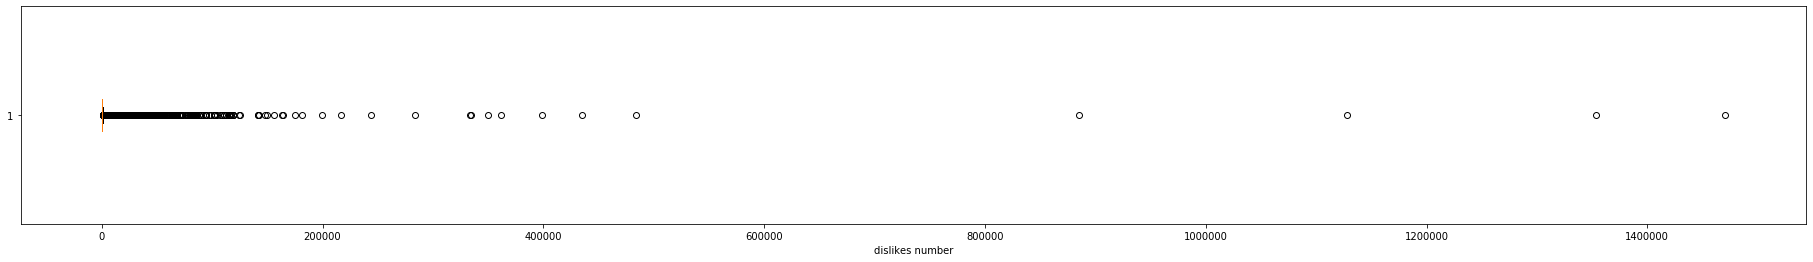

1286.5


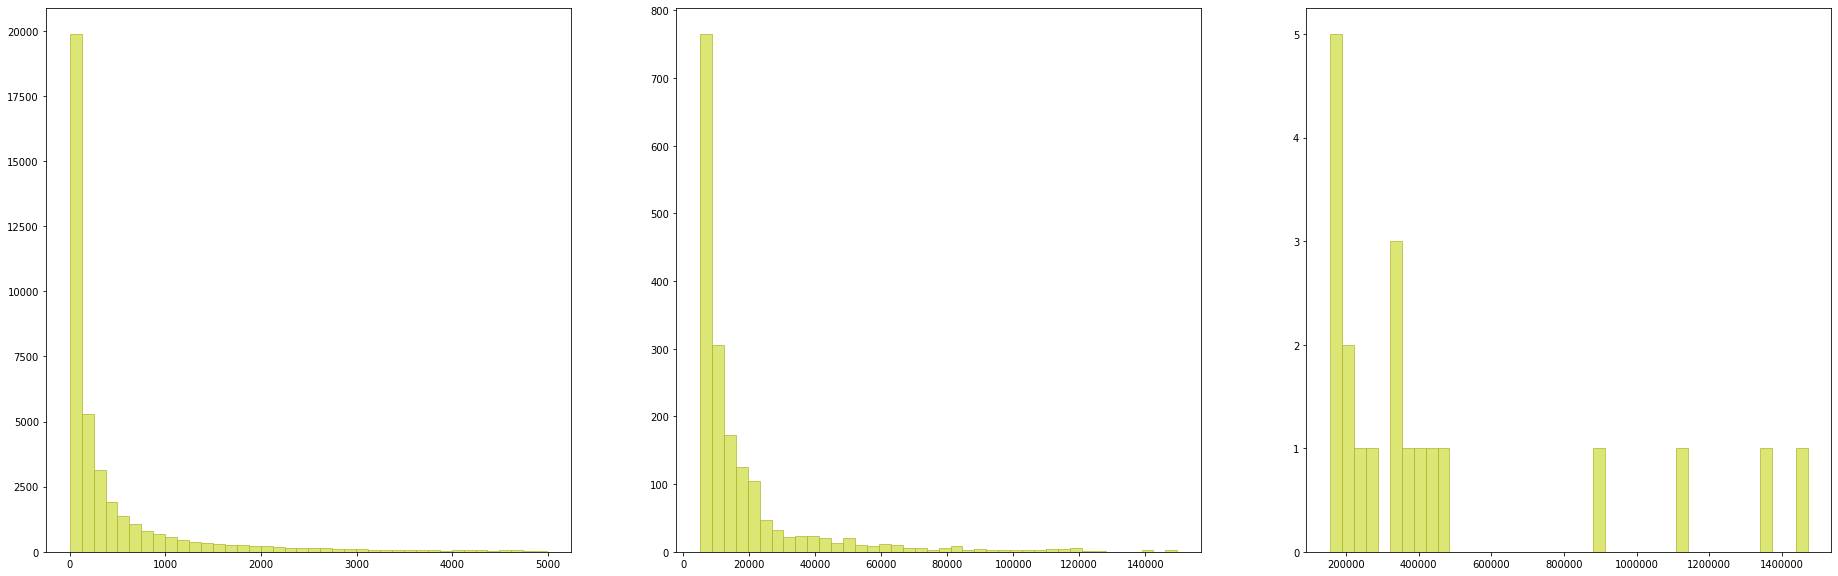

In [99]:
# 德国
de.box(32,4,'dislikes number')
de.seg_hist(5000,150000,32,10,'dislikes number','quantity')

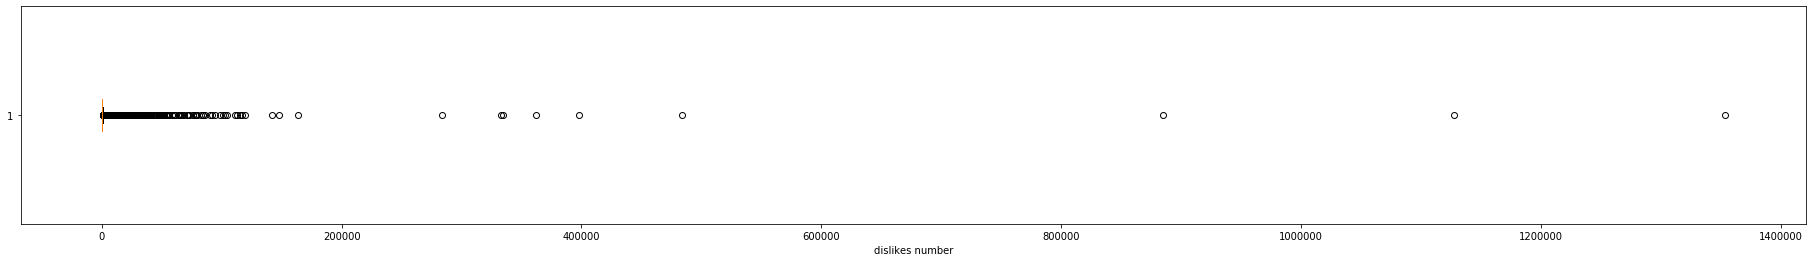

810.5


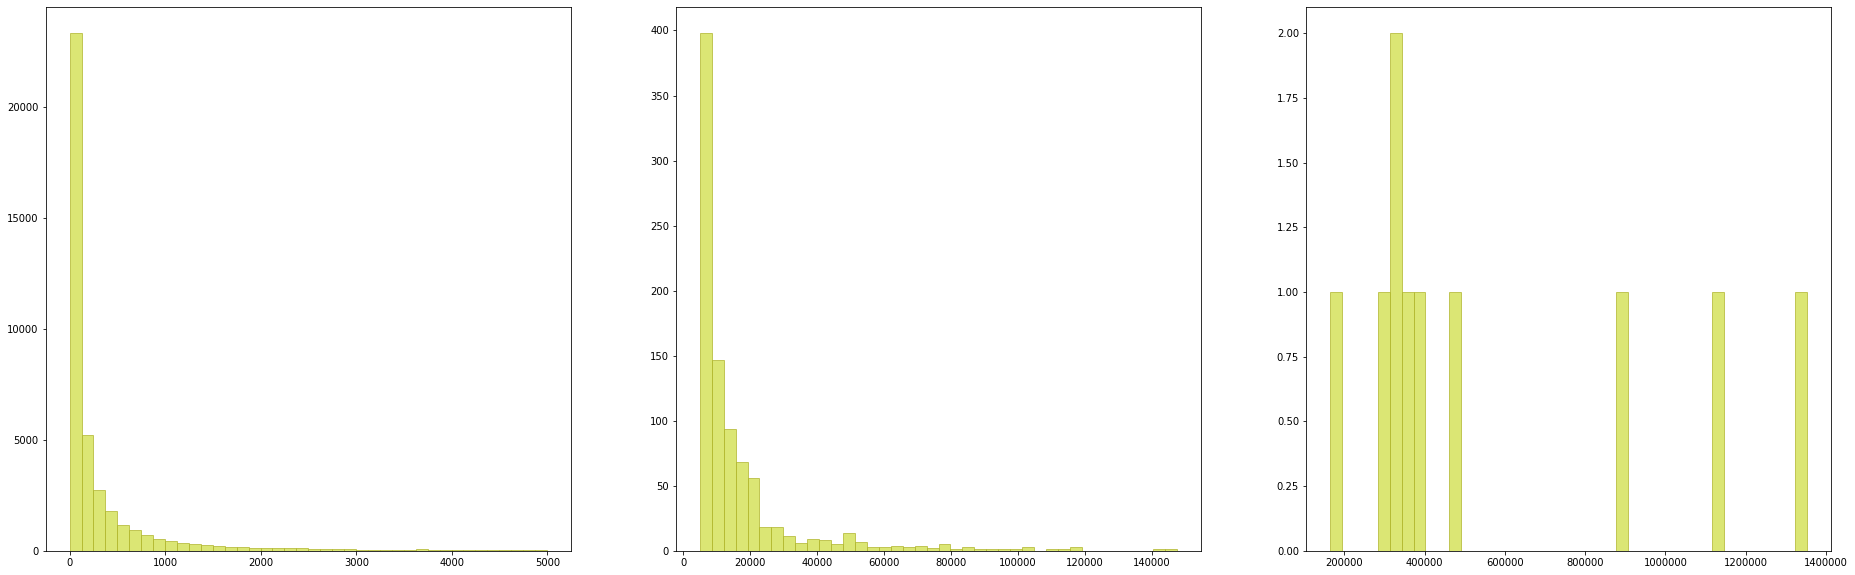

In [100]:
# 法国
fr.box(32,4,'dislikes number')
fr.seg_hist(5000,150000,32,10,'dislikes number','quantity')

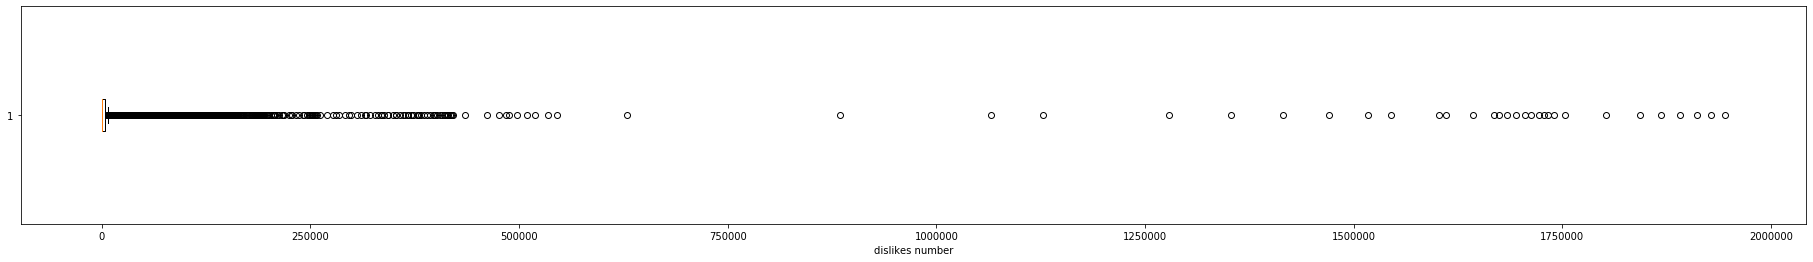

8093.75


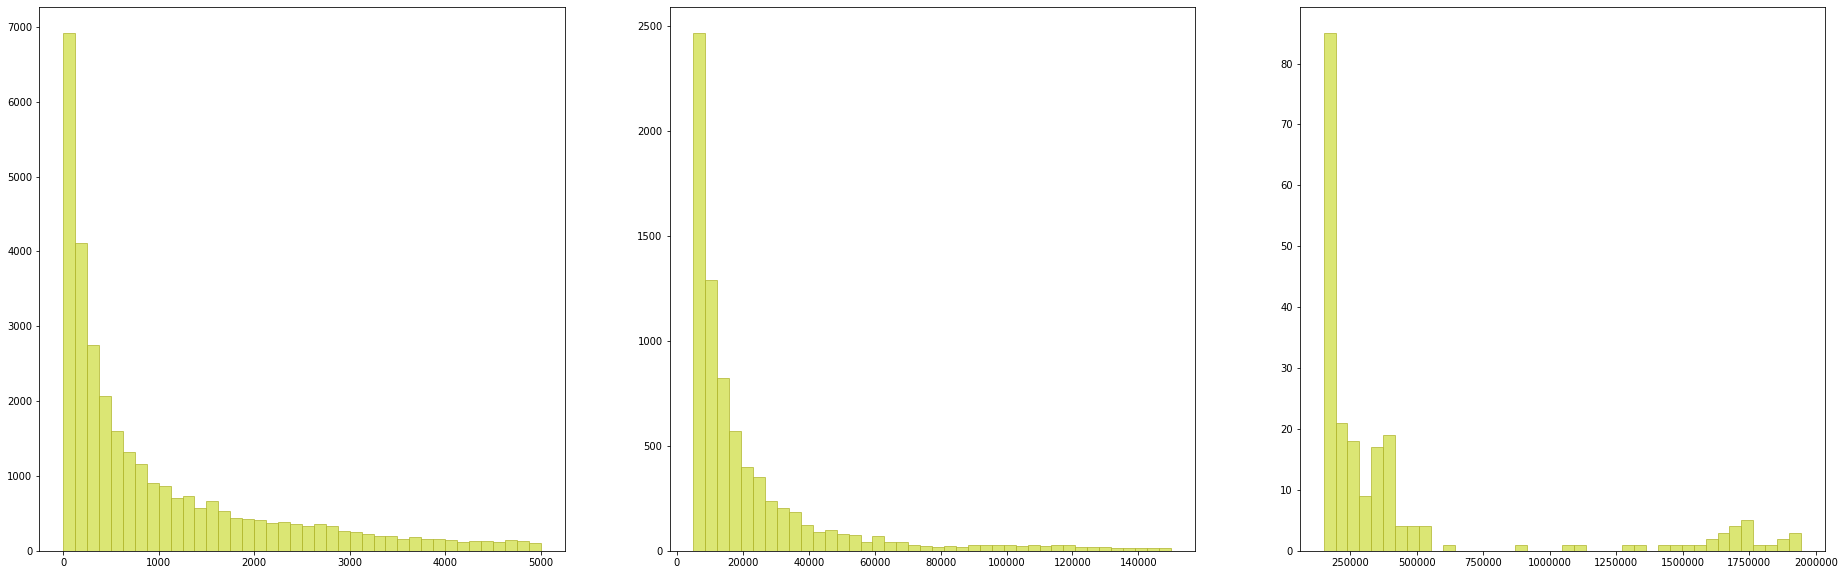

In [101]:
# 英国
gb.box(32,4,'dislikes number')
gb.seg_hist(5000,150000,32,10,'dislikes number','quantity')

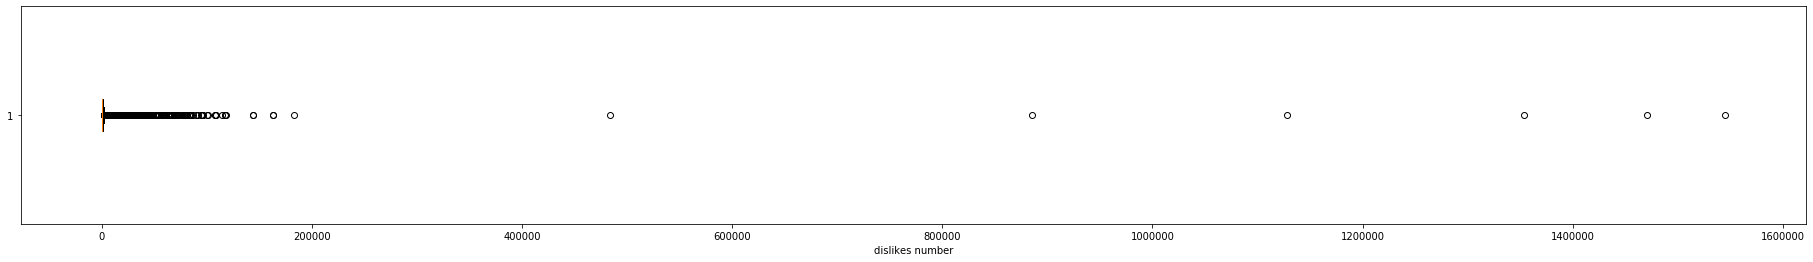

2386.125


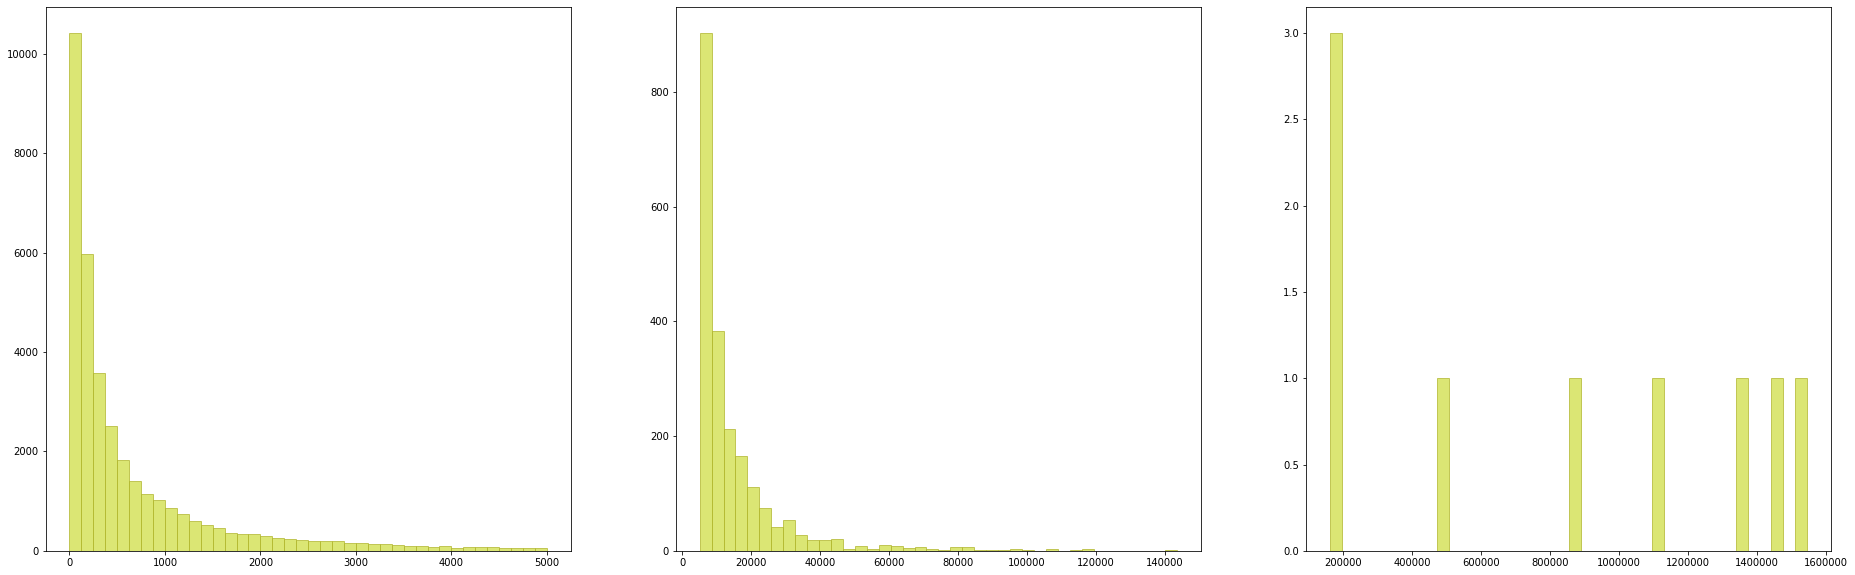

In [102]:
# 印度
In.box(32,4,'dislikes number')
In.seg_hist(5000,150000,32,10,'dislikes number','quantity')

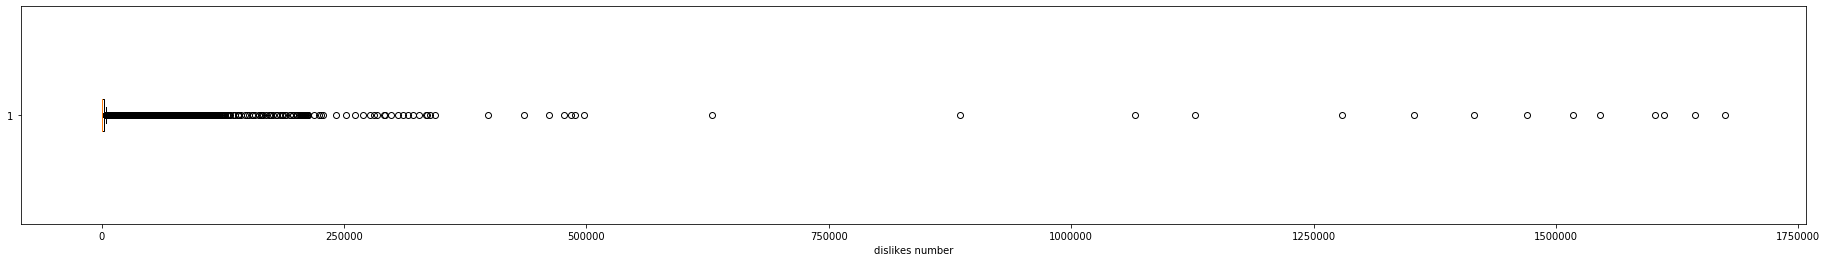

4542.0


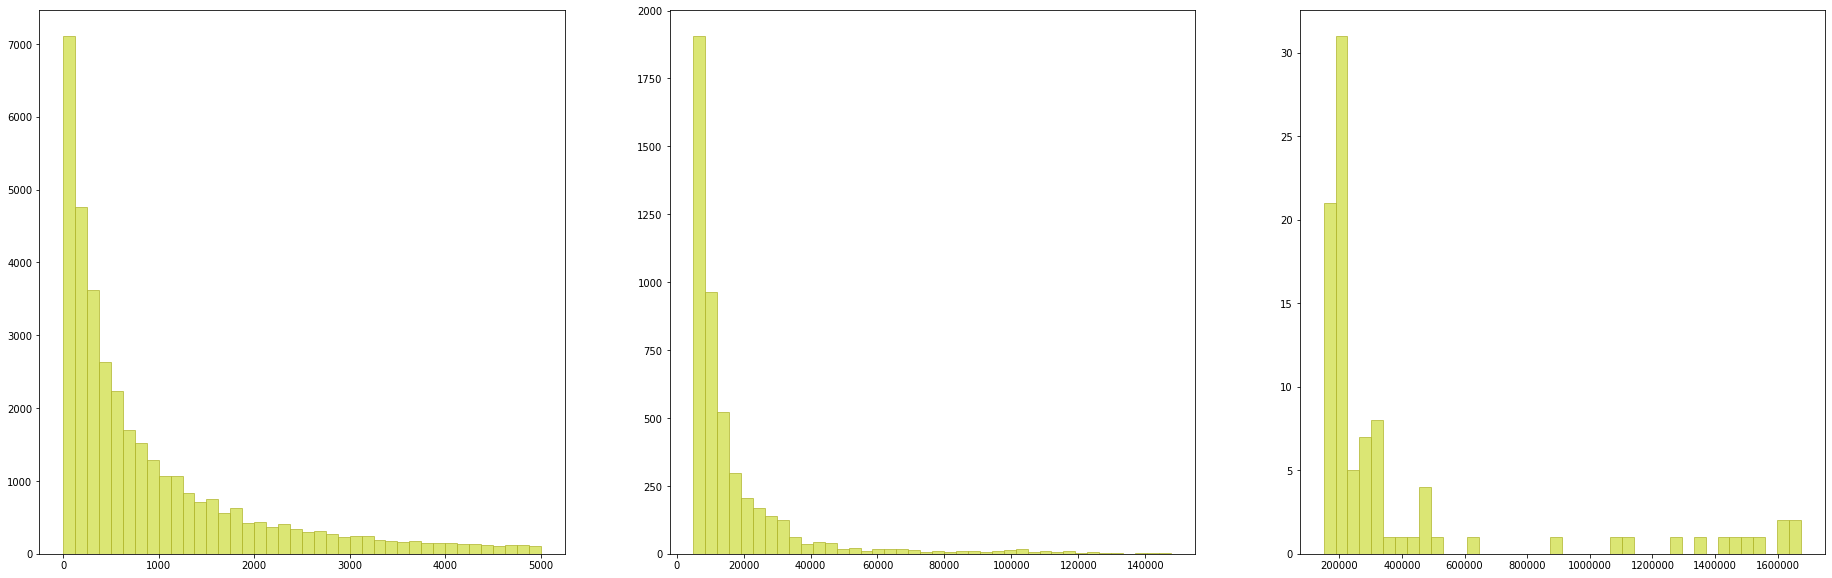

In [103]:
# 美国
us.box(32,4,'dislikes number')
us.seg_hist(5000,150000,32,10,'dislikes number','quantity')

### 2.7评论数量comment_count(无缺失值)

**数据摘要**

In [108]:
# 德国
de.select_col('comment_count')
de.five_number()

Min: 0
Q1: 79.0
Q2: 376.0
Q3: 1376.0
Max: 1084435


In [107]:
# 法国
fr.select_col('comment_count')
fr.five_number()

Min: 0
Q1: 56.0
Q2: 235.0
Q3: 841.0
Max: 1040912


In [106]:
# 英国
gb.select_col('comment_count')
gb.five_number()

Min: 0
Q1: 679.0
Q2: 2478.0
Q3: 9241.5
Max: 1626501


In [105]:
# 印度
In.select_col('comment_count')
In.five_number()

Min: 0
Q1: 81.0
Q2: 329.0
Q3: 1285.0
Max: 827755


In [104]:
# 美国
us.select_col('comment_count')
us.five_number()

Min: 0
Q1: 614.0
Q2: 1856.0
Q3: 5755.0
Max: 1361580


**数据分布**

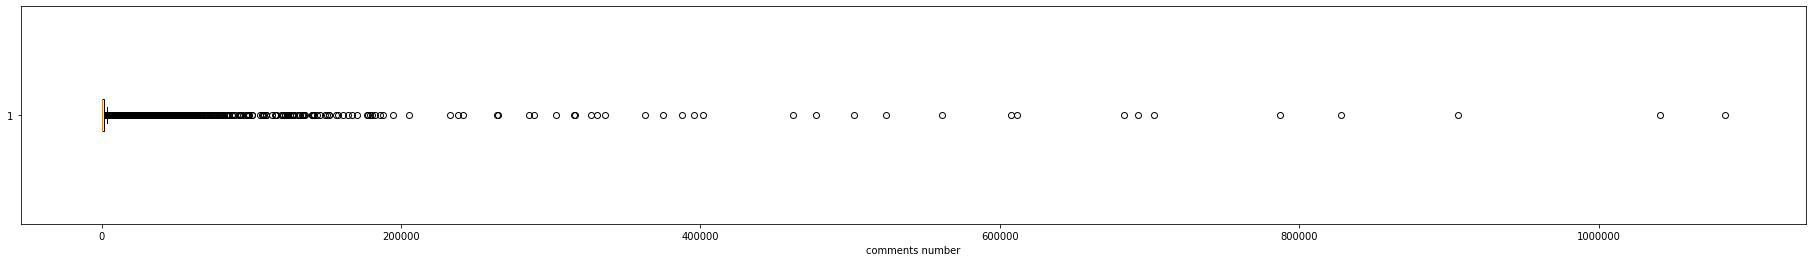

3321.5


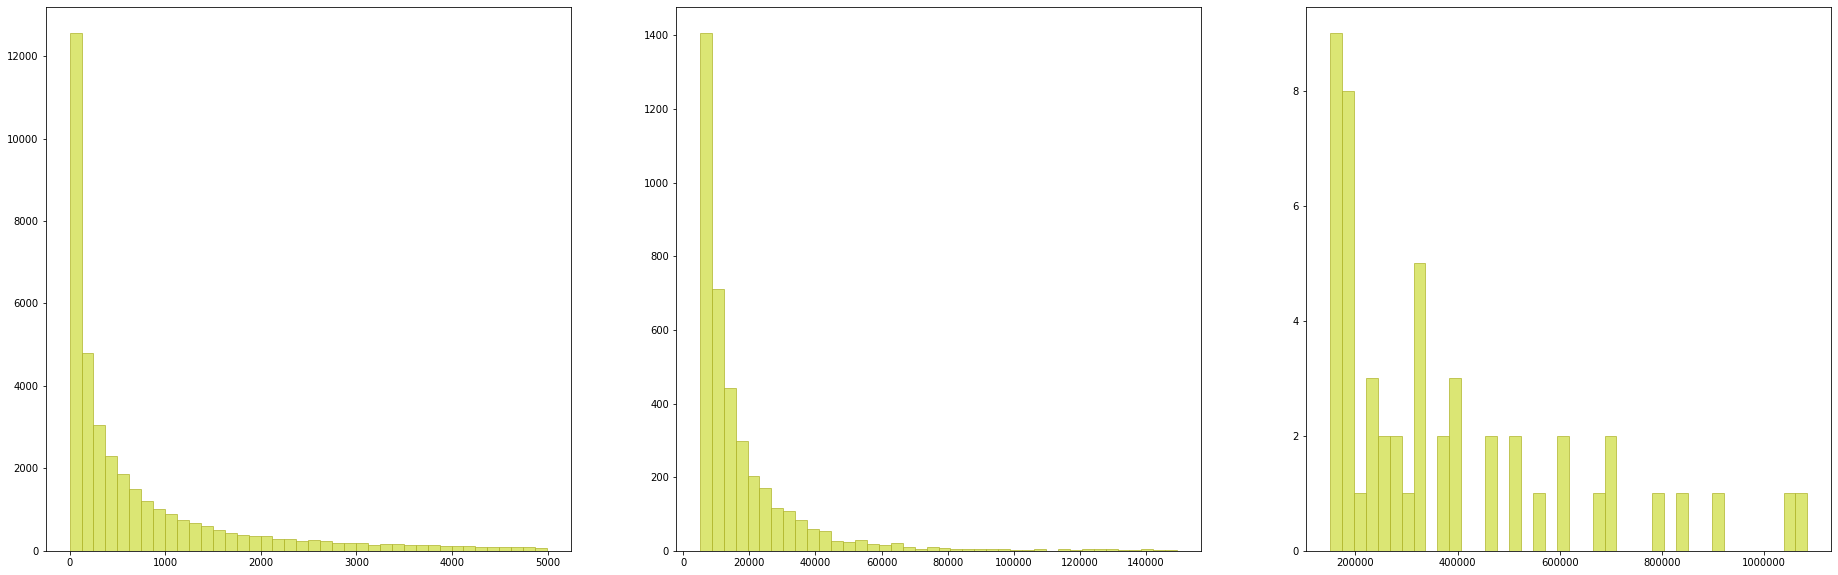

In [109]:
# 德国
de.box(32,4,'comments number')
de.seg_hist(5000,150000,32,10,'comments number','quantity')

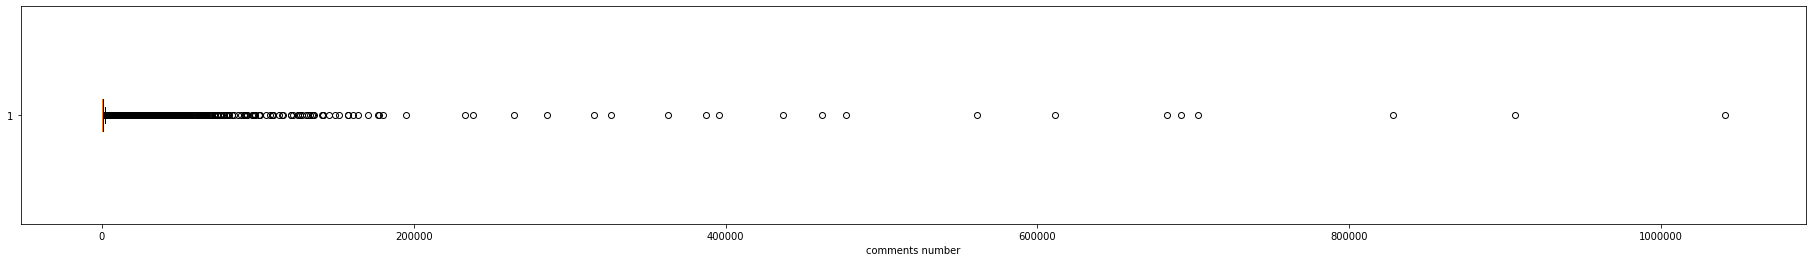

2018.5


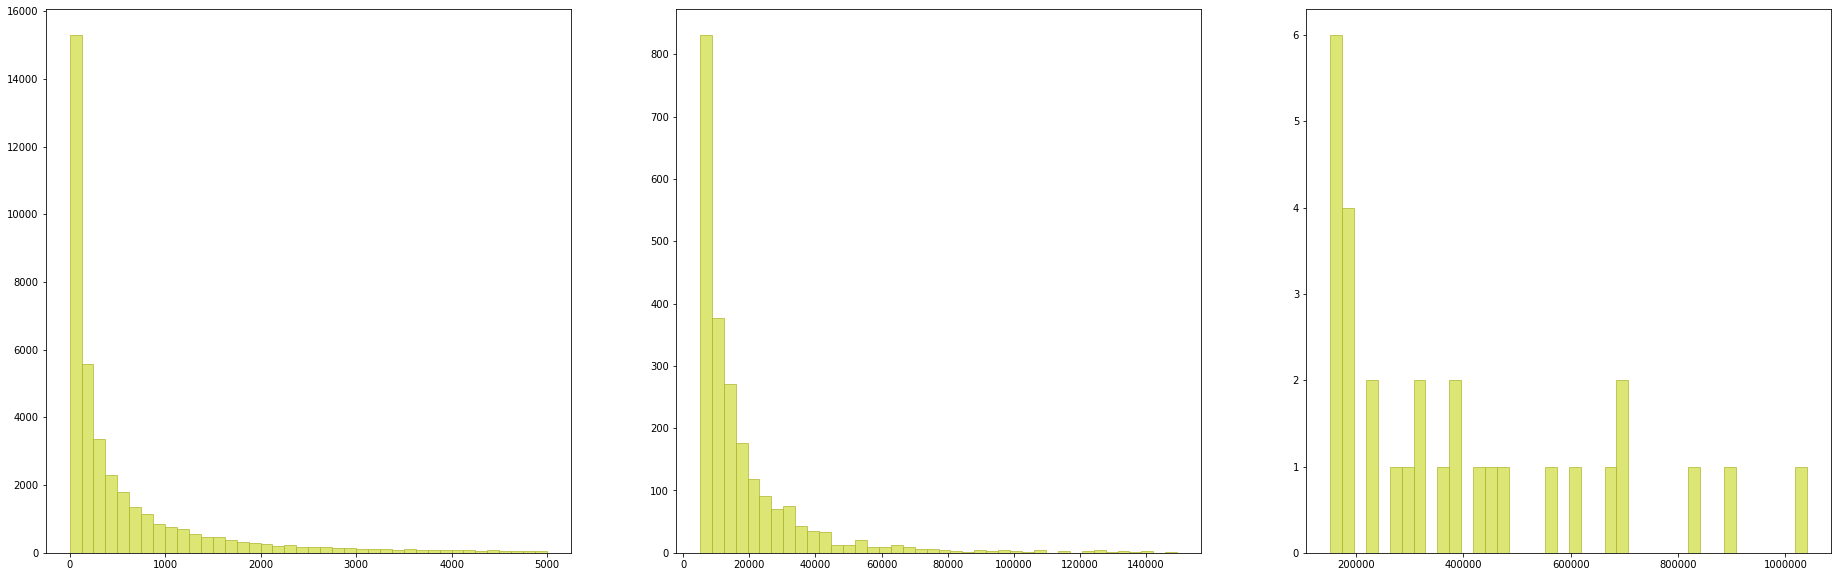

In [110]:
# 法国
fr.box(32,4,'comments number')
fr.seg_hist(5000,150000,32,10,'comments number','quantity')

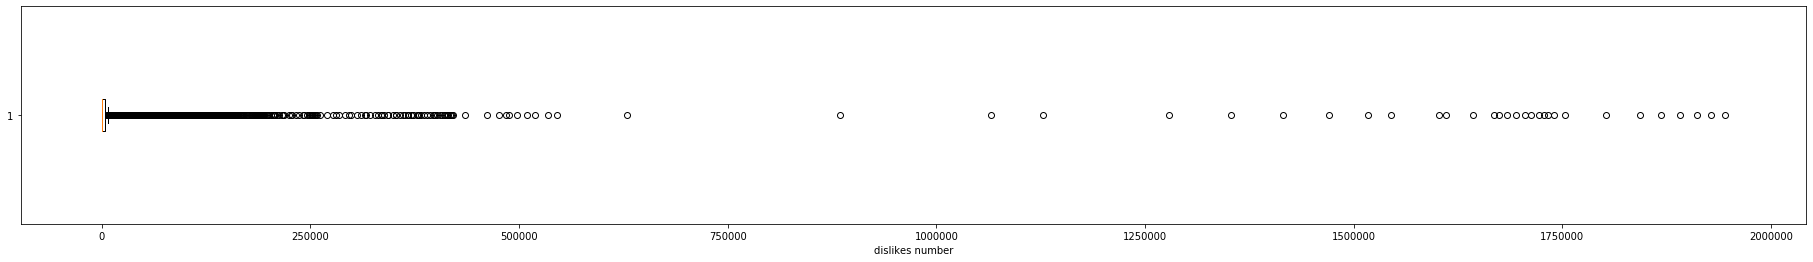

8093.75


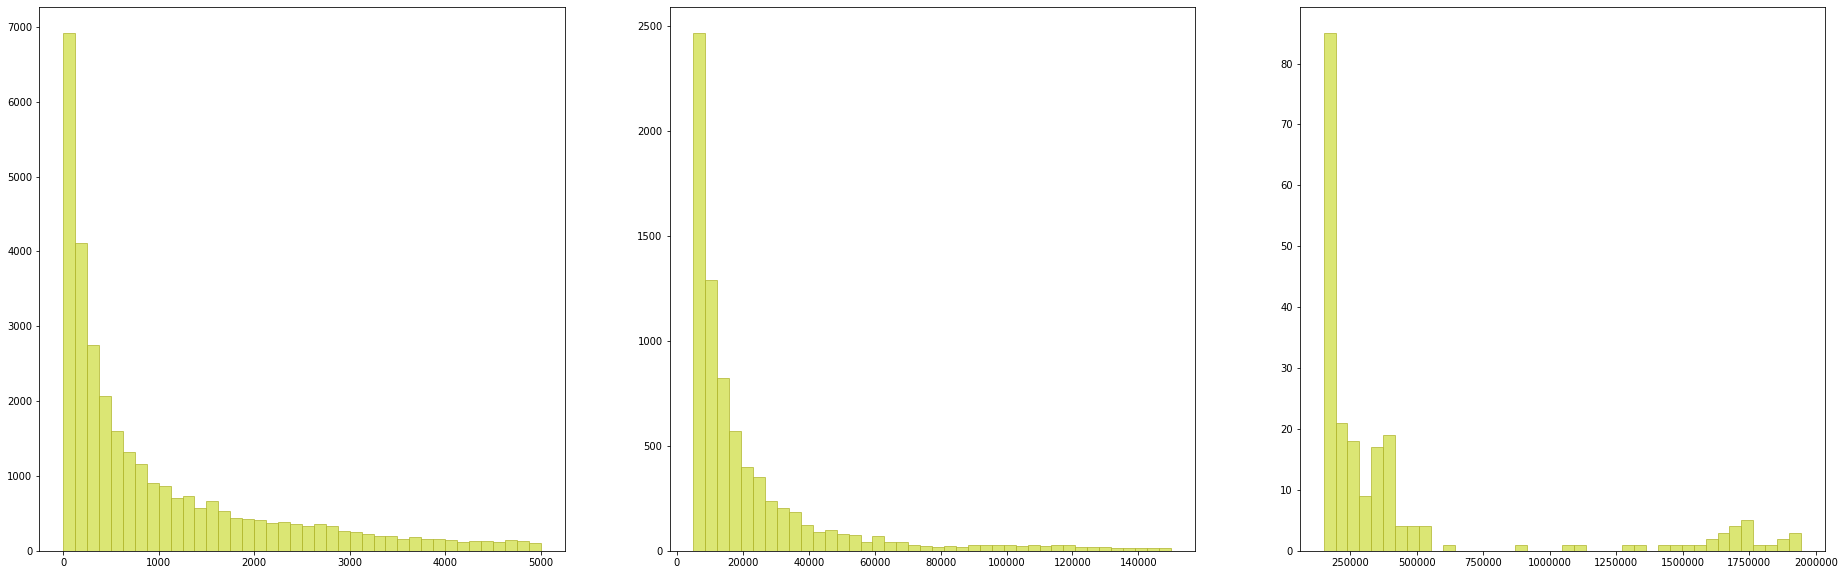

In [101]:
# 英国
gb.box(32,4,'dislikes number')
gb.seg_hist(5000,150000,32,10,'dislikes number','quantity')

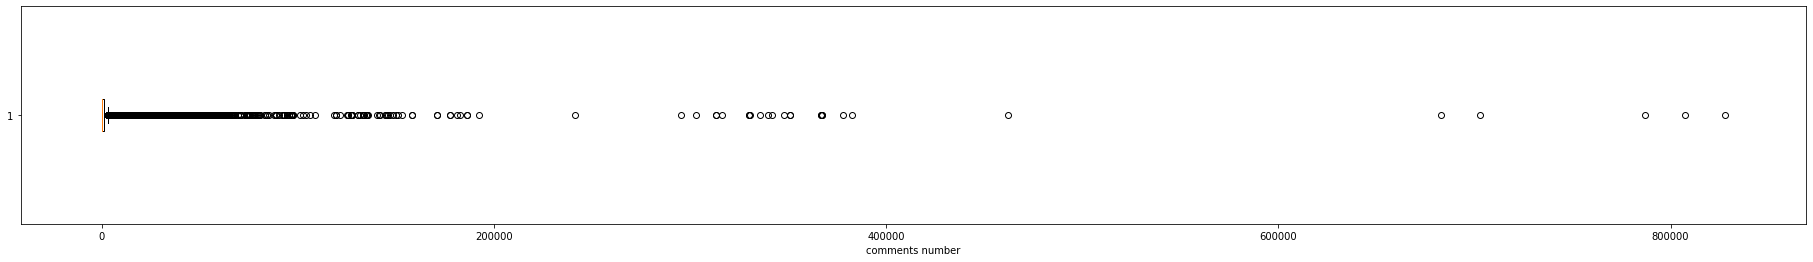

3091.0


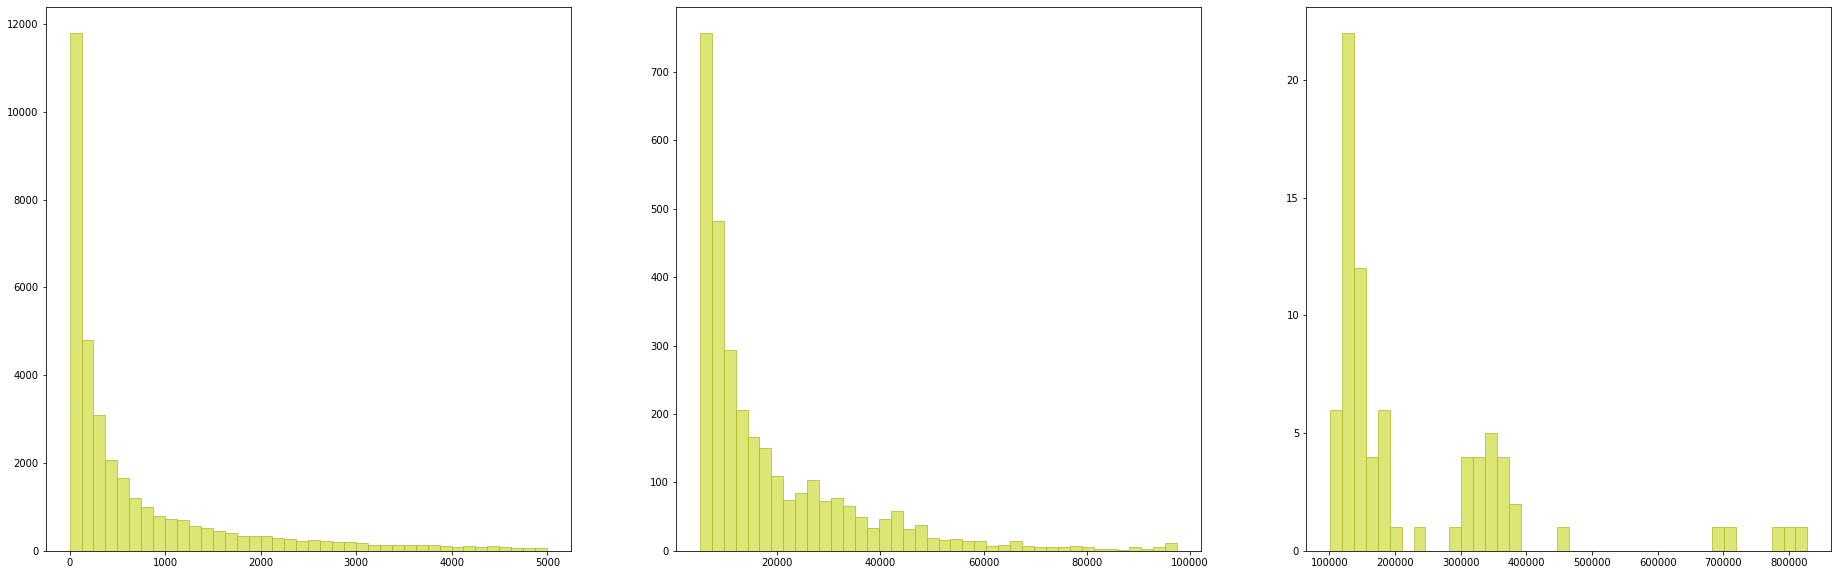

In [112]:
# 印度
In.box(32,4,'comments number')
In.seg_hist(5000,100000,32,10,'comments number','quantity')

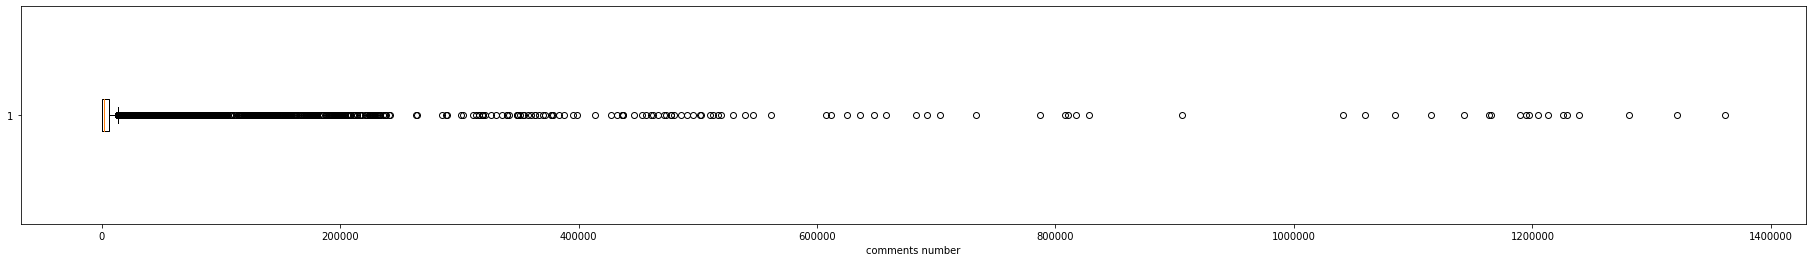

13466.5


In [116]:
# 美国
us.box(32,4,'comments number')

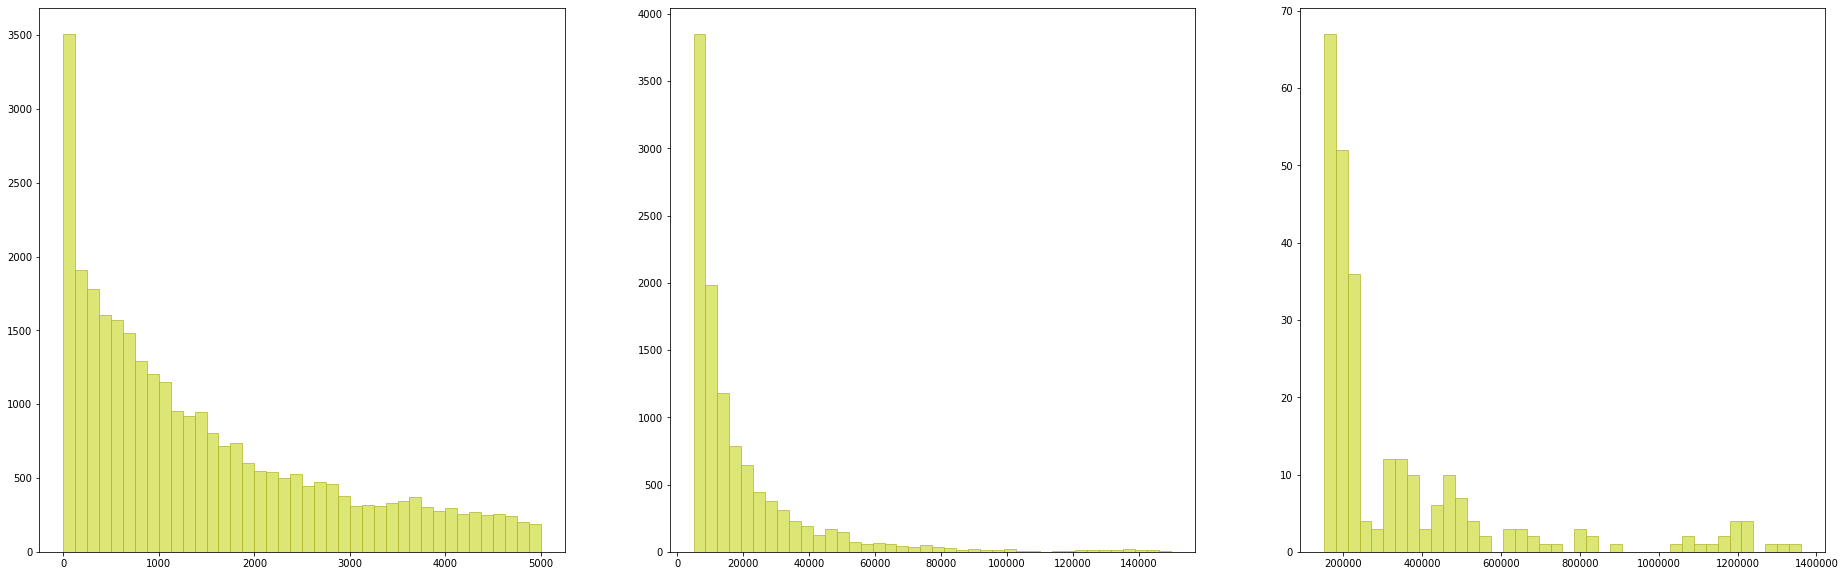

In [117]:
us.seg_hist(5000,150000,32,10,'comments number','quantity')

### 2.8 禁止评论comments_disabled(无缺失值)

**频数统计**

In [118]:
# 德国
de.select_col('comments_disabled')
de.get_fre()

False    39796
True      1044
Name: comments_disabled, dtype: int64


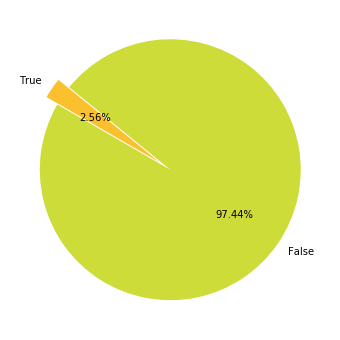

In [119]:
de.normal_pie(6,6)

In [120]:
# 法国
fr.select_col('comments_disabled')
fr.get_fre()

False    39835
True       889
Name: comments_disabled, dtype: int64


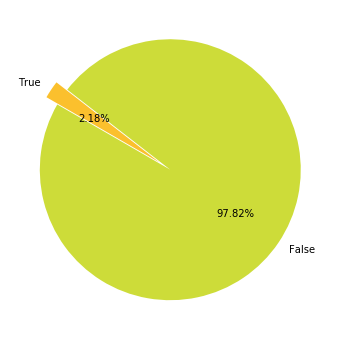

In [121]:
fr.normal_pie(6,6)

In [122]:
# 英国
gb.select_col('comments_disabled')
gb.get_fre()

False    38233
True       683
Name: comments_disabled, dtype: int64


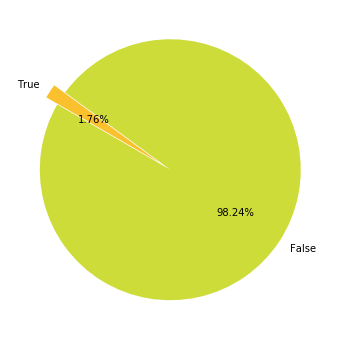

In [123]:
gb.normal_pie(6,6)

In [124]:
# 印度
In.select_col('comments_disabled')
In.get_fre()

False    36148
True      1204
Name: comments_disabled, dtype: int64


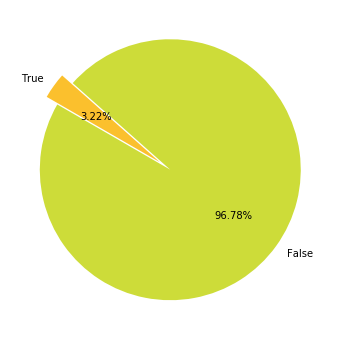

In [125]:
In.normal_pie(6,6)

In [126]:
# 美国
us.select_col('comments_disabled')
us.get_fre()

False    40316
True       633
Name: comments_disabled, dtype: int64


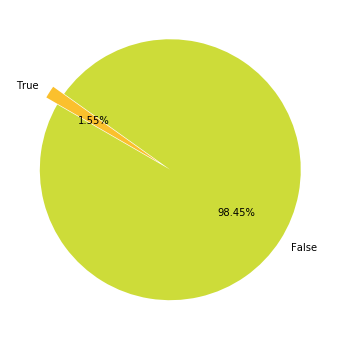

In [127]:
us.normal_pie(6,6)

### 2.9 禁止打分ratings_disabled(无缺失值)

**频数统计**

In [128]:
# 德国
de.select_col('ratings_disabled')
de.get_fre()

False    40168
True       672
Name: ratings_disabled, dtype: int64


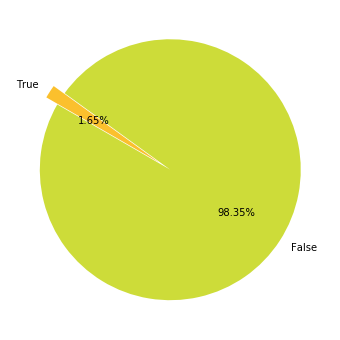

In [129]:
de.normal_pie(6,6)

In [130]:
# 法国
fr.select_col('ratings_disabled')
fr.get_fre()

False    40020
True       704
Name: ratings_disabled, dtype: int64


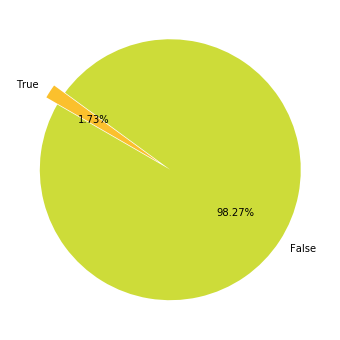

In [131]:
fr.normal_pie(6,6)

In [132]:
# 英国
gb.select_col('ratings_disabled')
gb.get_fre()

False    38644
True       272
Name: ratings_disabled, dtype: int64


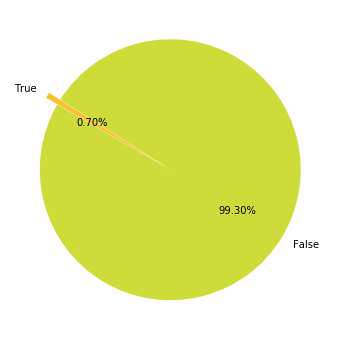

In [133]:
gb.normal_pie(6,6)

In [134]:
# 印度
In.select_col('ratings_disabled')
In.get_fre()

False    36571
True       781
Name: ratings_disabled, dtype: int64


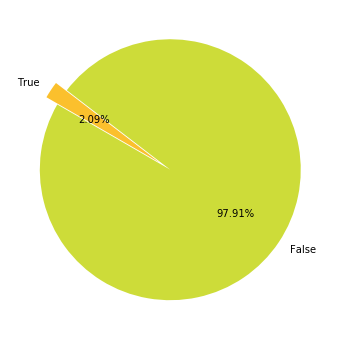

In [135]:
In.normal_pie(6,6)

In [136]:
# 美国
us.select_col('ratings_disabled')
us.get_fre()

False    40780
True       169
Name: ratings_disabled, dtype: int64


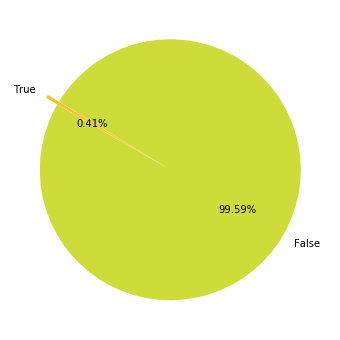

In [137]:
us.normal_pie(6,6)

### 2.10 视频错误或删除video_error_or_removed(无缺失值)

**频数统计**

In [138]:
# 德国
de.select_col('video_error_or_removed')
de.get_fre()

False    40826
True        14
Name: video_error_or_removed, dtype: int64


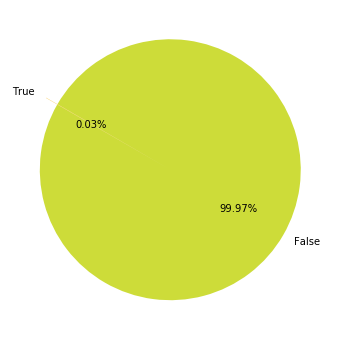

In [139]:
de.normal_pie(6,6)

In [140]:
# 法国
fr.select_col('video_error_or_removed')
fr.get_fre()

False    40702
True        22
Name: video_error_or_removed, dtype: int64


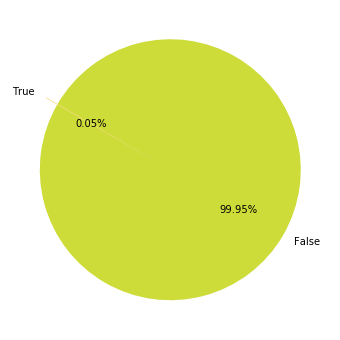

In [141]:
fr.normal_pie(6,6)

In [142]:
# 英国
gb.select_col('video_error_or_removed')
gb.get_fre()

False    38847
True        69
Name: video_error_or_removed, dtype: int64


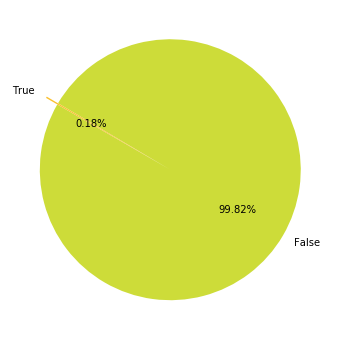

In [143]:
gb.normal_pie(6,6)

In [144]:
# 印度
In.select_col('video_error_or_removed')
In.get_fre()

False    37341
True        11
Name: video_error_or_removed, dtype: int64


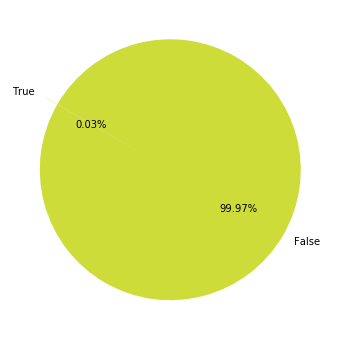

In [145]:
In.normal_pie(6,6)

In [146]:
# 美国
us.select_col('video_error_or_removed')
us.get_fre()

False    40926
True        23
Name: video_error_or_removed, dtype: int64


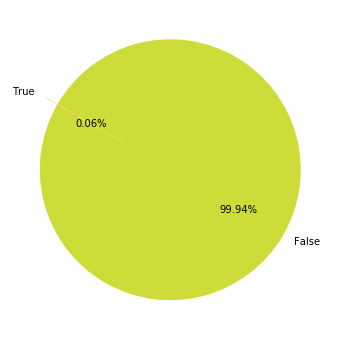

In [147]:
us.normal_pie(6,6)

### 2.11 视频描述description(有缺失值)

视频描述每个视频都是唯一的，所以无法用频数直方图来表示，视频的描述存在缺失值共1296条，应该是发布者本身就没有上传视频描述

In [150]:
# 德国
de.select_col('description')
n_b = de.count_none()

1552


In [151]:
de.fill_none('title')

In [152]:
n_a = de.count_none()

0


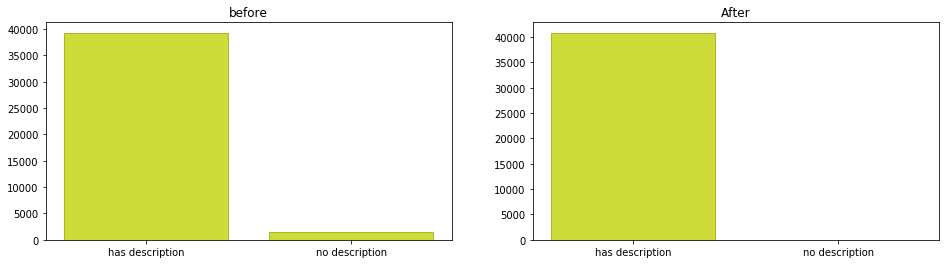

In [153]:
de.normal_bar(16,4,n_b,n_a,['has description','no description'])

In [158]:
# 法国
fr.select_col('description')
n_b = fr.count_none()

2912


In [159]:
fr.fill_none('title')
n_a = fr.count_none()

0


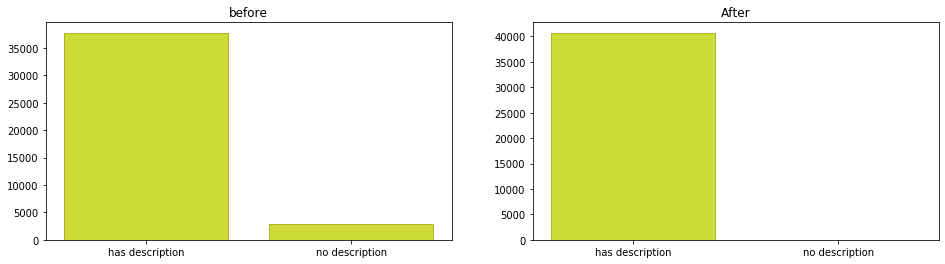

In [160]:
fr.normal_bar(16,4,n_b,n_a,['has description','no description'])

In [161]:
# 英国
gb.select_col('description')
n_b = gb.count_none()

612


In [162]:
gb.fill_none('title')
n_a = gb.count_none()

0


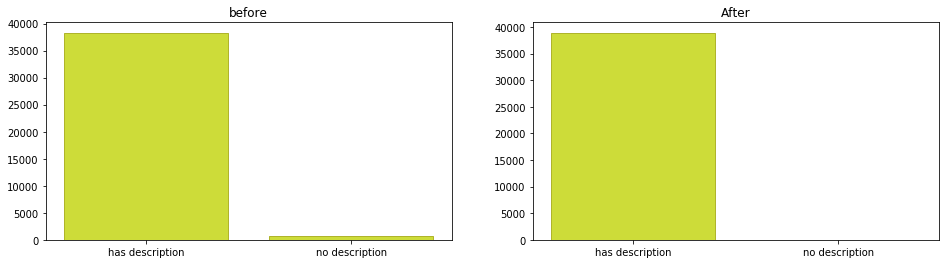

In [163]:
gb.normal_bar(16,4,n_b,n_a,['has description','no description'])

In [164]:
# 印度
In.select_col('description')
n_b = In.count_none()

561


In [165]:
In.fill_none('title')
n_a = In.count_none()

0


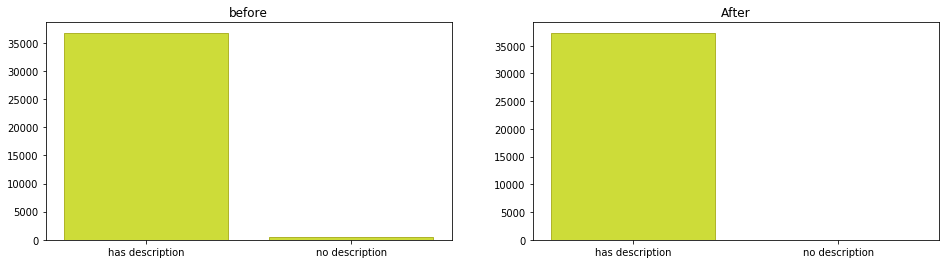

In [166]:
In.normal_bar(16,4,n_b,n_a,['has description','no description'])

In [167]:
# 美国
us.select_col('description')
n_b = us.count_none()

570


In [168]:
us.fill_none('title')
n_a = us.count_none()

0


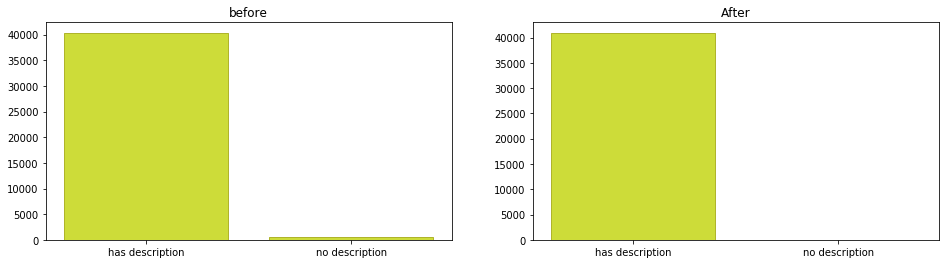

In [169]:
us.normal_bar(16,4,n_b,n_a,['has description','no description'])